In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

stats:

G = games played\
GS = games started\
MP = minutes played\
PER = player efficiency rating\
TS%	= true shooting percentage (point/(2 x TSA) (a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.)\
3PAr = 3-Point Attempt Rate (3PA / FGA)\
FTr	= Free Throw Rate or FTR is the ratio of Free Throw Attempts to Field Goal Attempts.\
ORB% = Offensive Rebound Percentage\
DRB% = Defensive Rebound Percentage\
TRB% = Total Rebound Percentage\
AST% = Assist Percentage\
STL% = steal percentage\
BLK% = block percentage\
TOV% = Turnover Percentage\
USG% = Usage Percentage\
blanl	\
OWS = Offensive Win Shares\
DWS	= Defensive Win Shares\
WS = Win Shares; an estimate of the number of wins contributed by a player\
WS/48 = Win Shares Per 48 Minutes\
blank2	\
OBPM = offensive Box Plus/Minus\
DBPM = defensive Box Plus/Minus\
BPM	= Box Plus/Minus, metric for evaluating basketball players' quality and contribution to the team\
VORP = Value Over Replacement Player\
FG = Field Goals\
FGA	= Field Goal attempts\
FG%	= Field Goals percentage\
3P = 3 pointers\
3PA	= 3 point attempts\
3P%	= 3 point percentage\
2P = 2-Point Field Goals\
2PA	= 2-Point Field Goals attempts\
2P%	= 2-Point Field Goals percentage\
eFG% = Effective Field Goal Percentage\
FT = Free Throws\
FTA	= Free Throws attempts\
FT%	= Free Throws percentage\
ORB	= Offensive Rebound\
DRB	= defensive rebound\
TRB	= total rebound\
AST	= assists\
STL	= steals\
BLK	= blocks\
TOV	= turnovers\
PF = personal fouls\
PTS = points\

In [2]:
df = pd.read_csv('data/nbaplayers1718_2.csv')

In [3]:
df[' Player Salary in $ '] = df[' Player Salary in $ '].str.replace(' ', '')
df[' Player Salary in $ '] = df[' Player Salary in $ '].str.replace('$', '')
df[' Player Salary in $ '] = df[' Player Salary in $ '].str.replace(',', '')
df[' Player Salary in $ '] = pd.to_numeric(df[' Player Salary in $ '])

In [4]:
df.drop(columns=['blanl', 'blank2'], inplace=True)

In [5]:
df.describe()

#  Season Start   Player Salary in $          Age  \
count    486.000000         486.0          4.230000e+02  486.000000   
mean   24392.170782        2017.0          7.380453e+06   26.405350   
std      171.748286           0.0          7.629048e+06    4.345194   
min    24096.000000        2017.0          1.722400e+04   19.000000   
25%    24242.250000        2017.0          1.545752e+06   23.000000   
50%    24392.500000        2017.0          4.046760e+06   26.000000   
75%    24541.750000        2017.0          1.149252e+07   29.000000   
max    24690.000000        2017.0          3.468255e+07   40.000000   

                G          GS           MP         PER         TS%  \
count  486.000000  486.000000   486.000000  486.000000  485.000000   
mean    53.783951   25.308642  1223.051440   13.020782    0.526944   
std     24.835638   28.715875   842.438143    5.762420    0.089771   
min      1.000000    0.000000     1.000000  -17.600000    0.000000   
25%     35.250000    1.000000   449.500000    9.800000    0.502000   
50%     62.500000   11.000000  1197.500000   12.800000    0.537000   
75%     75.000000   49.750000  1942.250000   15.800000    0.576000   
max     82.000000   82.000000  3048.000000   31.500000    0.799000   

             3PAr         FTr        ORB%        DRB%        TRB%        AST%  \
count  485.000000  485.000000  486.000000  486.000000  486.000000  486.000000   
mean     0.314058    0.270179    5.067901   15.211934   10.145267   13.067695   
std      0.209748    0.180287    4.246585    7.337450    5.201848    9.172849   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.156000    0.165000    1.900000   10.325000    6.225000    6.525000   
50%      0.324000    0.237000    3.550000   14.050000    8.950000   10.100000   
75%      0.455000    0.339000    7.700000   18.875000   13.100000   17.575000   
max      1.000000    2.000000   26.300000  100.000000   56.400000   57.300000   

             STL%        BLK%        TOV%        USG%         OWS         DWS  \
count  486.000000  486.000000  485.000000  486.000000  486.000000  486.000000   
mean     1.545062    1.664403   12.809072   18.608848    1.335597    1.243416   
std      0.923243    1.690613    5.332382    5.597041    2.081620    1.085874   
min      0.000000    0.000000    0.000000    0.000000   -1.700000    0.000000   
25%      1.100000    0.500000    9.600000   14.600000    0.000000    0.400000   
50%      1.400000    1.200000   12.400000   18.100000    0.600000    1.000000   
75%      1.900000    2.400000   15.400000   21.500000    2.000000    1.875000   
max     11.100000   17.300000   43.600000   41.700000   11.500000    6.000000   

               WS       WS/48        OBPM        DBPM         BPM        VORP  \
count  486.000000  486.000000  486.000000  486.000000  486.000000  486.000000   
mean     2.580247    0.077249   -1.397531   -0.304733   -1.701852    0.616667   
std      2.898265    0.082869    3.396019    2.033137    4.220521    1.454814   
min     -0.800000   -0.473000  -22.400000   -7.100000  -26.900000   -1.400000   
25%      0.400000    0.041000   -2.900000   -1.600000   -3.600000   -0.100000   
50%      1.800000    0.082000   -1.300000   -0.300000   -1.500000    0.100000   
75%      3.775000    0.116750    0.175000    0.900000    0.375000    0.900000   
max     15.000000    0.480000   11.800000   12.000000   15.600000   12.400000   

               FG          FGA         FG%          3P         3PA  \
count  486.000000   486.000000  485.000000  486.000000  486.000000   
mean   197.656379   432.337449    0.441268   48.864198  136.676955   
std    174.667670   371.858588    0.099094   56.011800  147.204832   
min      0.000000     0.000000    0.000000    0.000000    0.000000   
25%     55.000000   120.250000    0.399000    3.000000   10.000000   
50%    160.500000   361.000000    0.442000   28.500000   94.000000   
75%    289.750000   633.750000    0.485000   78.000000  220.000000 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #                     486 non-null    int64  
 1   Season Start          486 non-null    int64  
 2   Player Name           486 non-null    object 
 3    Player Salary in $   423 non-null    float64
 4   Pos                   486 non-null    object 
 5   Age                   486 non-null    int64  
 6   Tm                    486 non-null    object 
 7   G                     486 non-null    int64  
 8   GS                    486 non-null    int64  
 9   MP                    486 non-null    int64  
 10  PER                   486 non-null    float64
 11  TS%                   485 non-null    float64
 12  3PAr                  485 non-null    float64
 13  FTr                   485 non-null    float64
 14  ORB%                  486 non-null    float64
 15  DRB%                  4

In [7]:
cleaned_df = df.fillna({'TS%':df['TS%'].mean(),
            '3PAr':df['3PAr'].mean(),
            'FTr':df['FTr'].mean(),
            'TOV%':df['TOV%'].mean(),
            'FG%':df['FG%'].mean(),
            '3P%':df['3P%'].mean(),
            '2P%':df['2P%'].mean(),
           'eFG%':df['eFG%'].mean(),
           'FT%':df['FT%'].mean()})

In [8]:
cleaned_df = cleaned_df.dropna()

In [9]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 485
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #                     423 non-null    int64  
 1   Season Start          423 non-null    int64  
 2   Player Name           423 non-null    object 
 3    Player Salary in $   423 non-null    float64
 4   Pos                   423 non-null    object 
 5   Age                   423 non-null    int64  
 6   Tm                    423 non-null    object 
 7   G                     423 non-null    int64  
 8   GS                    423 non-null    int64  
 9   MP                    423 non-null    int64  
 10  PER                   423 non-null    float64
 11  TS%                   423 non-null    float64
 12  3PAr                  423 non-null    float64
 13  FTr                   423 non-null    float64
 14  ORB%                  423 non-null    float64
 15  DRB%                  4

In [10]:
filtered_df = cleaned_df[cleaned_df['MP']>200]

In [11]:
def get_x_y(df):
    y = df[' Player Salary in $ ']
    X = df.drop(columns=['Age', '#', 'Season Start', 'Player Name', ' Player Salary in $ ', 'Pos', 'Tm'])
    return X, y

In [12]:
X, y = get_x_y(filtered_df)

In [13]:
columns = X.columns

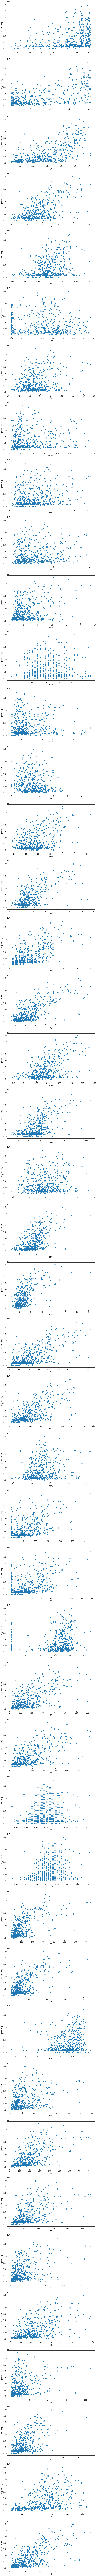

In [14]:
fig, ax = plt.subplots(len(columns),1, figsize=(10,300))
for i, col in enumerate(columns):
    ax[i].scatter(X[col], y)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('player salary')

In [15]:
X_train, X_test, y_train, y_test = tts(X,y)

In [16]:
rf_base = RandomForestRegressor()
rf_base.fit(X_train,y_train)
rf_base.score(X_test,y_test)

0.63381779672171

In [17]:
rf_base_predict = rf_base.predict(X)

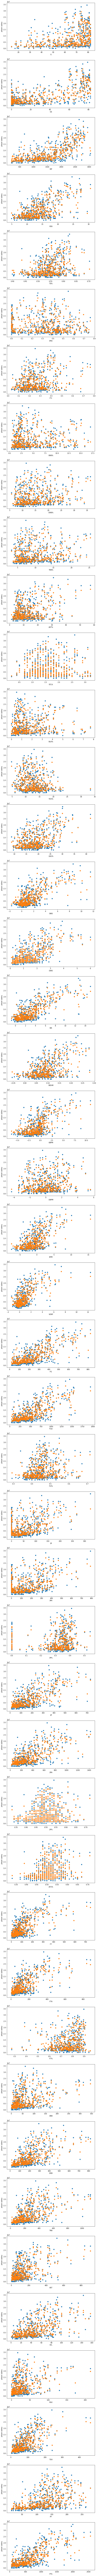

In [18]:
fig, ax = plt.subplots(len(columns),1, figsize=(10,300))
for i, col in enumerate(columns):
    ax[i].scatter(X[col], y)
    ax[i].scatter(X[col], rf_base_predict)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('player salary')

In [19]:
final = filtered_df.copy()

In [20]:
final['rf_base_predict'] = rf_base_predict
final['rf_base_predict-actual'] = final['rf_base_predict'] - final[' Player Salary in $ ']

In [21]:
final[['Player Name', ' Player Salary in $ ', 'rf_base_predict', 'rf_base_predict-actual']]

Player Name   Player Salary in $   rf_base_predict  \
1       Aaron Brooks             2116955.0       2379139.35   
2       Aaron Gordon             5504420.0       6915789.91   
5         Al Horford            27734405.0      24102623.31   
6       Al Jefferson             9769821.0       7968477.58   
8      Alan Williams             6000000.0       4813882.71   
..               ...                   ...              ...   
481  Wilson Chandler            12016854.0      10608046.19   
482     Yogi Ferrell             1312611.0       2295228.43   
483      Zach LaVine             3202217.0       4821124.83   
484    Zach Randolph            12307692.0      10847572.62   
485    Zaza Pachulia             3477600.0       7093844.59   

     rf_base_predict-actual  
1                 262184.35  
2                1411369.91  
5               -3631781.69  
6               -1801343.42  
8               -1186117.29  
..                      ...  
481             -1408807.81  
482               982617.43  
483              1618907.83  
484             -1460119.38  
485              3616244.59  

[378 rows x 4 columns]

In [22]:
final[final['rf_base_predict-actual']<-10000000][['Player Name', ' Player Salary in $ ', 'rf_base_predict', 'rf_base_predict-actual']]

Player Name   Player Salary in $   rf_base_predict  \
218    Joakim Noah            17765000.0       5844010.50   
425  Stephen Curry            34682550.0      22612416.49   

     rf_base_predict-actual  
218            -11920989.50  
425            -12070133.51

In [23]:
final[final['Player Name']=='LeBron James']

#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
293  24365          2017  LeBron James            33285709.0  SF   32  CLE   

      G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  \
293  74  74  2794  27.0  0.619  0.254  0.395   4.0  20.7  12.6  41.3   1.6   

     BLK%  TOV%  USG%  OWS  DWS    WS  WS/48  OBPM  DBPM  BPM  VORP   FG  \
293   1.3  16.1  30.0  9.8  3.0  12.9  0.221   6.8   1.6  8.4   7.3  736   

      FGA    FG%   3P  3PA    3P%   2P   2PA   2P%  eFG%   FT  FTA    FT%  \
293  1344  0.548  124  342  0.363  612  1002  0.61  0.59  358  531  0.674   

     ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  rf_base_predict  \
293   97  543  640  646   92   44  303  134  1954      29281838.22   

     rf_base_predict-actual  
293             -4003870.78

In [24]:
final[final['Player Name']=='Stephen Curry']

#  Season Start    Player Name   Player Salary in $  Pos  Age   Tm  \
425  24216          2017  Stephen Curry            34682550.0  PG   28  GSW   

      G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  \
425  79  79  2638  24.6  0.624  0.547  0.251   2.7  11.4   7.3  31.1   2.6   

     BLK%  TOV%  USG%  OWS  DWS    WS  WS/48  OBPM  DBPM  BPM  VORP   FG  \
425   0.5  13.0  30.1  8.6  3.9  12.6  0.229   7.7  -0.4  7.3   6.2  675   

      FGA    FG%   3P  3PA    3P%   2P  2PA   2P%  eFG%   FT  FTA    FT%  ORB  \
425  1443  0.468  324  789  0.411  351  654  0.54  0.58  325  362  0.898   61   

     DRB  TRB  AST  STL  BLK  TOV   PF   PTS  rf_base_predict  \
425  292  353  523  143   17  239  183  1999      22612416.49   

     rf_base_predict-actual  
425            -12070133.51

In [25]:
final[(final[' Player Salary in $ ']<5000000) & (final['Pos']=='C')].sort_values('rf_base_predict', ascending=False).head(5)

#  Season Start    Player Name   Player Salary in $  Pos  Age   Tm  \
342  24630          2017   Myles Turner             2569920.0   C   20  IND   
352  24380          2017   Nikola Jokic             1471382.0   C   21  DEN   
256  24500          2017   Jusuf Nurkic             2947305.0   C   22  TOT   
485  24515          2017  Zaza Pachulia             3477600.0   C   32  GSW   
187  24537          2017   Jakob Poeltl             2825640.0   C   21  TOR   

      G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  \
342  81  81  2541  18.5  0.585  0.132  0.349   6.2  19.5  13.0   6.6   1.5   
352  73  59  2038  26.4  0.640  0.163  0.267  11.6  27.2  19.5  28.8   1.5   
256  65  48  1391  17.5  0.528  0.002  0.393  12.3  24.8  18.6  13.9   1.8   
485  70  70  1268  16.1  0.588  0.007  0.410  12.9  22.0  17.7  13.6   2.2   
187  54   4   626  12.2  0.589  0.000  0.496  14.1  15.7  14.9   2.7   1.4   

     BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP   FG  FGA  \
342   6.0   9.5  19.5  4.3  3.7  8.0  0.151  -0.3   2.7  2.4   2.8  444  869   
352   2.1  15.2  23.5  7.7  2.0  9.7  0.229   6.2   2.2  8.3   5.3  494  854   
256   4.2  18.6  23.9  0.2  1.8  2.0  0.068  -2.3   2.2 -0.2   0.6  271  534   
485   2.0  19.5  15.3  2.2  2.5  4.7  0.177  -0.3   3.0  2.7   1.5  164  307   
187   2.8  17.2  12.1  0.9  0.7  1.6  0.125  -1.2   0.5 -0.7   0.2   67  115   

       FG%  3P  3PA       3P%   2P  2PA   2P%  eFG%   FT  FTA    FT%  ORB  \
342  0.511  40  115  0.348000  404  754  0.54  0.53  245  303  0.809  139   
352  0.578  45  139  0.324000  449  715  0.63  0.61  188  228  0.825  212   
256  0.507   0    1  0.000000  271  533  0.51  0.51  120  210  0.571  154   
485  0.534   0    2  0.000000  164  305  0.54  0.53   98  126  0.778  140   
187  0.583   0    0  0.299342   67  115  0.58  0.58   31   57  0.544   78   

     DRB  TRB  AST  STL  BLK  TOV   PF   PTS  rf_base_predict  \
342  448  587  106   74  173  105  262  1173      10600630.63   
352  506  718  359   61   56  171  214  1221       9644372.27   
256  313  467  123   50   74  143  161   662       7428795.06   
485  270  410  132   59   33   88  166   426       7093844.59   
187   87  165   12   17   20   29  113   165       7049946.95   

     rf_base_predict-actual  
342              8030710.63  
352              8172990.27  
256              4481490.06  
485              3616244.59  
187              4224306.95

In [26]:
final[final['Player Name']=='Jeremy Lin']

#  Season Start Player Name   Player Salary in $  Pos  Age   Tm   G  \
214  24422          2017  Jeremy Lin            12000000.0  PG   28  BRK  36   

     GS   MP   PER    TS%  3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  \
214  33  883  19.2  0.566  0.39  0.353   1.3  14.7   8.1  35.5   2.2   1.2   

     TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP   FG  FGA    FG%  \
214  15.7  26.6  1.3  0.8  2.1  0.115   2.5  -0.5  2.0   0.9  175  400  0.438   

     3P  3PA    3P%   2P  2PA   2P%  eFG%   FT  FTA    FT%  ORB  DRB  TRB  \
214  58  156  0.372  117  244  0.48  0.51  115  141  0.816   11  124  135   

     AST  STL  BLK  TOV  PF  PTS  rf_base_predict  rf_base_predict-actual  
214  184   41   14   86  79  523       9386332.76             -2613667.24

In [27]:
final.columns

Index(['#', 'Season Start', 'Player Name', ' Player Salary in $ ', 'Pos',
       'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'rf_base_predict', 'rf_base_predict-actual'],
      dtype='object')

In [28]:
drop_columns = ['TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 
       'FG%', '3P%', '2P%', 'eFG%', 'FT%']

In [29]:
dropped_df = filtered_df.copy()
dropped_df = dropped_df.drop(columns=drop_columns)
X, y = get_x_y(dropped_df)

In [30]:
X_train, X_test, y_train, y_test = tts(X,y)

In [31]:
rf_dropped = RandomForestRegressor()
rf_dropped.fit(X_train,y_train)
rf_dropped.score(X_test,y_test)

0.5714590486980066

In [32]:
rf_dropped_predict = rf_dropped.predict(X)

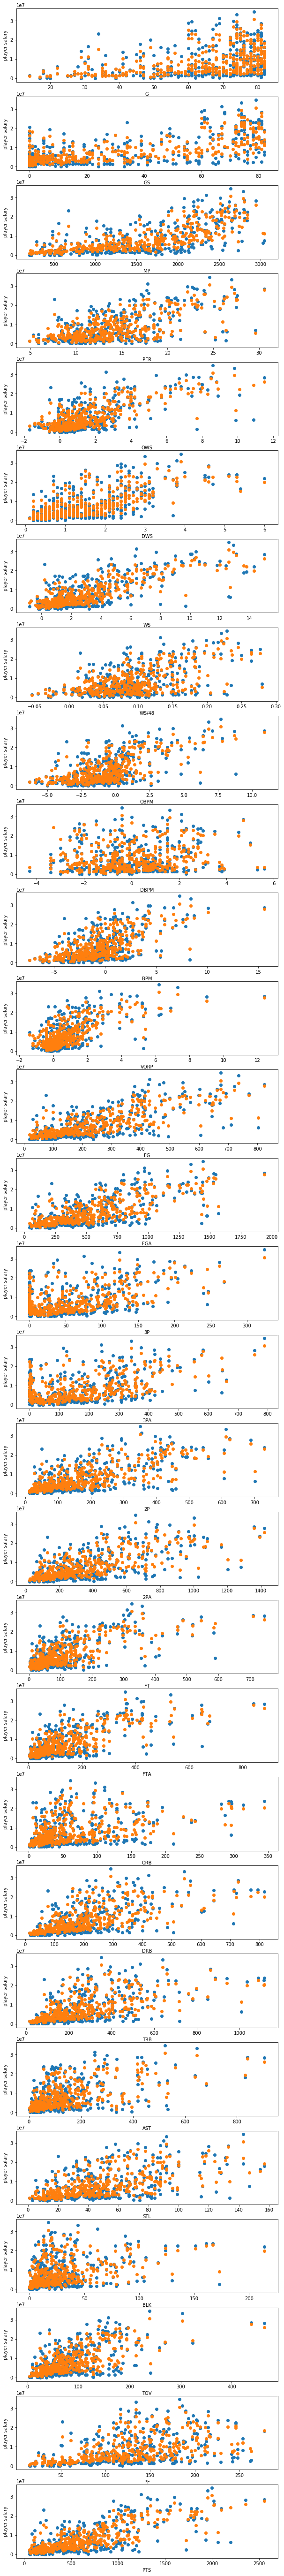

In [33]:
columns = X.columns
fig, ax = plt.subplots(len(columns),1, figsize=(10,100))
for i, col in enumerate(columns):
    ax[i].scatter(X[col], y)
    ax[i].scatter(X[col], rf_dropped_predict)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('player salary')

In [34]:
final_dropped = dropped_df.copy()
final_dropped['rf_dropped_predict'] = rf_dropped_predict
final_dropped['rf_dropped_predict-actual'] = final_dropped['rf_dropped_predict'] - final_dropped[' Player Salary in $ ']

In [35]:
final_dropped

#  Season Start      Player Name   Player Salary in $  Pos  Age   Tm  \
1    24165          2017     Aaron Brooks             2116955.0  PG   32  IND   
2    24289          2017     Aaron Gordon             5504420.0  SF   21  ORL   
5    24343          2017       Al Horford            27734405.0   C   30  BOS   
6    24366          2017     Al Jefferson             9769821.0   C   32  IND   
8    24660          2017    Alan Williams             6000000.0   C   24  PHO   
..     ...           ...              ...                   ...  ..  ...  ...   
481  24192          2017  Wilson Chandler            12016854.0  SF   29  DEN   
482  24259          2017     Yogi Ferrell             1312611.0  PG   23  TOT   
483  24408          2017      Zach LaVine             3202217.0  SG   21  MIN   
484  24550          2017    Zach Randolph            12307692.0  PF   35  MEM   
485  24515          2017    Zaza Pachulia             3477600.0   C   32  GSW   

      G  GS    MP   PER  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP   FG  \
1    65   0   894   9.5 -0.2  0.5  0.3  0.016  -2.1  -2.6 -4.6  -0.6  121   
2    80  72  2298  14.4  2.0  1.7  3.7  0.076  -0.2  -0.4 -0.7   0.8  393   
5    68  68  2193  17.7  3.6  2.7  6.3  0.137   1.0   2.1  3.1   2.8  379   
6    66   1   931  18.9  1.2  1.1  2.3  0.119  -1.5  -1.5 -3.1  -0.3  235   
8    47   0   708  19.5  1.1  0.9  2.1  0.142  -1.8   0.2 -1.7   0.1  138   
..   ..  ..   ...   ...  ...  ...  ...    ...   ...   ...  ...   ...  ...   
481  71  33  2197  14.9  2.4  1.1  3.6  0.078   0.5  -1.3 -0.8   0.7  433   
482  46  29  1197  13.1  0.8  1.0  1.8  0.072  -0.1  -0.7 -0.7   0.4  160   
483  47  47  1749  14.6  2.5  0.4  3.0  0.082   2.1  -2.4 -0.3   0.8  326   
484  73   5  1786  18.5  0.8  2.4  3.2  0.086  -1.4  -0.7 -2.1   0.0  433   
485  70  70  1268  16.1  2.2  2.5  4.7  0.177  -0.3   3.0  2.7   1.5  164   

     FGA   3P  3PA   2P  2PA   FT  FTA  ORB  DRB  TRB  AST  STL  BLK  TOV  \
1    300   48  128   73  172   32   40   18   51   69  125   25    9   66   
2    865   77  267  316  598  156  217  116  289  405  150   64   40   89   
5    801   86  242  293  559  108  135   95  369  464  337   52   87  116   
6    471    0    1  235  470   65   85   75  203  278   57   19   16   33   
8    267    0    1  138  266   70  112   94  198  292   23   27   32   37   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
481  939  110  326  323  613  141  194  103  356  459  141   52   30  114   
482  394   68  176   92  218   74   89   20   91  111  172   42    9   70   
483  710  120  310  206  400  117  140   18  141  159  139   41   10   85   
484  964   21   94  412  870  141  193  182  416  598  122   38   10   99   
485  307    0    2  164  305   98  126  140  270  410  132   59   33   88   

      PF   PTS  rf_dropped_predict  rf_dropped_predict-actual  
1     93   322          3611156.92                 1494201.92  
2    172  1019          7492655.44                 1988235.44  
5    138   952         22975362.83                -4759042.17  
6    125   535          4837387.40                -4932433.60  
8    125   346          5756991.47                 -243008.53  
..   ...   ...                 ...                        ...  
481  172  1117          7972455.38                -4044398.62  
482   90   462          3170207.09                 1857596.09  
483  104   889          5300722.56                 2098505.56  
484  136  1028          8072309.81                -4235382.19  
485  166   426          5803737.86                 2326137.86  

[378 rows x 38 columns]

In [36]:
final_dropped[final_dropped['Player Name']=='LeBron James']

#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
293  24365          2017  LeBron James            33285709.0  SF   32  CLE   

      G  GS    MP   PER  OWS  DWS    WS  WS/48  OBPM  DBPM  BPM  VORP   FG  \
293  74  74  2794  27.0  9.8  3.0  12.9  0.221   6.8   1.6  8.4   7.3  736   

      FGA   3P  3PA   2P   2PA   FT  FTA  ORB  DRB  TRB  AST  STL  BLK  TOV  \
293  1344  124  342  612  1002  358  531   97  543  640  646   92   44  303   

      PF   PTS  rf_dropped_predict  rf_dropped_predict-actual  
293  134  1954         29496290.01                -3789418.99

In [37]:
final_dropped[final_dropped['Player Name']=='Stephen Curry']

#  Season Start    Player Name   Player Salary in $  Pos  Age   Tm  \
425  24216          2017  Stephen Curry            34682550.0  PG   28  GSW   

      G  GS    MP   PER  OWS  DWS    WS  WS/48  OBPM  DBPM  BPM  VORP   FG  \
425  79  79  2638  24.6  8.6  3.9  12.6  0.229   7.7  -0.4  7.3   6.2  675   

      FGA   3P  3PA   2P  2PA   FT  FTA  ORB  DRB  TRB  AST  STL  BLK  TOV  \
425  1443  324  789  351  654  325  362   61  292  353  523  143   17  239   

      PF   PTS  rf_dropped_predict  rf_dropped_predict-actual  
425  183  1999         30703371.52                -3979178.48

In [38]:
final_dropped[final_dropped['Player Name']=='James Harden']

#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
192  24306          2017  James Harden            28299399.0  PG   27  HOU   

      G  GS    MP   PER   OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP   FG  \
192  81  81  2947  27.3  11.5  3.6  15.0  0.245   8.7   1.5  10.1   9.0  674   

      FGA   3P  3PA   2P  2PA   FT  FTA  ORB  DRB  TRB  AST  STL  BLK  TOV  \
192  1533  262  756  412  777  746  881   95  564  659  906  120   37  464   

      PF   PTS  rf_dropped_predict  rf_dropped_predict-actual  
192  215  2356         26139337.13                -2160061.87

In [39]:
final_dropped

#  Season Start      Player Name   Player Salary in $  Pos  Age   Tm  \
1    24165          2017     Aaron Brooks             2116955.0  PG   32  IND   
2    24289          2017     Aaron Gordon             5504420.0  SF   21  ORL   
5    24343          2017       Al Horford            27734405.0   C   30  BOS   
6    24366          2017     Al Jefferson             9769821.0   C   32  IND   
8    24660          2017    Alan Williams             6000000.0   C   24  PHO   
..     ...           ...              ...                   ...  ..  ...  ...   
481  24192          2017  Wilson Chandler            12016854.0  SF   29  DEN   
482  24259          2017     Yogi Ferrell             1312611.0  PG   23  TOT   
483  24408          2017      Zach LaVine             3202217.0  SG   21  MIN   
484  24550          2017    Zach Randolph            12307692.0  PF   35  MEM   
485  24515          2017    Zaza Pachulia             3477600.0   C   32  GSW   

      G  GS    MP   PER  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP   FG  \
1    65   0   894   9.5 -0.2  0.5  0.3  0.016  -2.1  -2.6 -4.6  -0.6  121   
2    80  72  2298  14.4  2.0  1.7  3.7  0.076  -0.2  -0.4 -0.7   0.8  393   
5    68  68  2193  17.7  3.6  2.7  6.3  0.137   1.0   2.1  3.1   2.8  379   
6    66   1   931  18.9  1.2  1.1  2.3  0.119  -1.5  -1.5 -3.1  -0.3  235   
8    47   0   708  19.5  1.1  0.9  2.1  0.142  -1.8   0.2 -1.7   0.1  138   
..   ..  ..   ...   ...  ...  ...  ...    ...   ...   ...  ...   ...  ...   
481  71  33  2197  14.9  2.4  1.1  3.6  0.078   0.5  -1.3 -0.8   0.7  433   
482  46  29  1197  13.1  0.8  1.0  1.8  0.072  -0.1  -0.7 -0.7   0.4  160   
483  47  47  1749  14.6  2.5  0.4  3.0  0.082   2.1  -2.4 -0.3   0.8  326   
484  73   5  1786  18.5  0.8  2.4  3.2  0.086  -1.4  -0.7 -2.1   0.0  433   
485  70  70  1268  16.1  2.2  2.5  4.7  0.177  -0.3   3.0  2.7   1.5  164   

     FGA   3P  3PA   2P  2PA   FT  FTA  ORB  DRB  TRB  AST  STL  BLK  TOV  \
1    300   48  128   73  172   32   40   18   51   69  125   25    9   66   
2    865   77  267  316  598  156  217  116  289  405  150   64   40   89   
5    801   86  242  293  559  108  135   95  369  464  337   52   87  116   
6    471    0    1  235  470   65   85   75  203  278   57   19   16   33   
8    267    0    1  138  266   70  112   94  198  292   23   27   32   37   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
481  939  110  326  323  613  141  194  103  356  459  141   52   30  114   
482  394   68  176   92  218   74   89   20   91  111  172   42    9   70   
483  710  120  310  206  400  117  140   18  141  159  139   41   10   85   
484  964   21   94  412  870  141  193  182  416  598  122   38   10   99   
485  307    0    2  164  305   98  126  140  270  410  132   59   33   88   

      PF   PTS  rf_dropped_predict  rf_dropped_predict-actual  
1     93   322          3611156.92                 1494201.92  
2    172  1019          7492655.44                 1988235.44  
5    138   952         22975362.83                -4759042.17  
6    125   535          4837387.40                -4932433.60  
8    125   346          5756991.47                 -243008.53  
..   ...   ...                 ...                        ...  
481  172  1117          7972455.38                -4044398.62  
482   90   462          3170207.09                 1857596.09  
483  104   889          5300722.56                 2098505.56  
484  136  1028          8072309.81                -4235382.19  
485  166   426          5803737.86                 2326137.86  

[378 rows x 38 columns]

In [40]:
final_dropped[(final_dropped[' Player Salary in $ ']<5000000) & (final_dropped['Pos']=='C')].sort_values('rf_dropped_predict', ascending=False).head(5)

#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
342  24630          2017  Myles Turner             2569920.0   C   20  IND   
256  24500          2017  Jusuf Nurkic             2947305.0   C   22  TOT   
11   24413          2017      Alex Len             4187599.0   C   23  PHO   
352  24380          2017  Nikola Jokic             1471382.0   C   21  DEN   
78   24182          2017  Clint Capela             2334520.0   C   22  HOU   

      G  GS    MP   PER  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP   FG  \
342  81  81  2541  18.5  4.3  3.7  8.0  0.151  -0.3   2.7  2.4   2.8  444   
256  65  48  1391  17.5  0.2  1.8  2.0  0.068  -2.3   2.2 -0.2   0.6  271   
11   77  34  1560  15.0  1.2  1.7  3.0  0.091  -3.0   1.2 -1.8   0.1  230   
352  73  59  2038  26.4  7.7  2.0  9.7  0.229   6.2   2.2  8.3   5.3  494   
78   65  59  1551  21.4  3.9  2.1  6.0  0.185   0.0   1.0  1.0   1.2  362   

     FGA  3P  3PA   2P  2PA   FT  FTA  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
342  869  40  115  404  754  245  303  139  448  587  106   74  173  105  262   
256  534   0    1  271  533  120  210  154  313  467  123   50   74  143  161   
11   463   3   12  227  451  150  208  156  354  510   44   37   98  102  242   
352  854  45  139  449  715  188  228  212  506  718  359   61   56  171  214   
78   563   0    0  362  563   94  177  178  348  526   64   34   80   87  179   

      PTS  rf_dropped_predict  rf_dropped_predict-actual  
342  1173          9089481.21                 6519561.21  
256   662          8802690.50                 5855385.50  
11    613          7534375.53                 3346776.53  
352  1221          7063902.32                 5592520.32  
78    818          6873263.84                 4538743.84

In [97]:
final_dropped[(final_dropped[' Player Salary in $ ']<5000000) & (final_dropped['Pos']=='PG')].sort_values('rf_dropped_predict', ascending=False).head(5)

#  Season Start     Player Name   Player Salary in $  Pos  Age   Tm  \
413  24215          2017      Seth Curry             3028410.0  PG   26  DAL   
429  24444          2017  T.J. McConnell             1471382.0  PG   24  PHI   
139  24527          2017   Elfrid Payton             3332340.0  PG   22  ORL   
119  24562          2017    Derrick Rose             2116955.0  PG   28  NYK   
190  24487          2017   Jameer Nelson             4736050.0  PG   34  DEN   

      G  GS    MP   PER  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP   FG  \
413  70  42  2029  15.5  2.9  1.7  4.6  0.109   1.8  -0.4  1.4   1.7  338   
429  81  51  2133  13.7  1.4  2.4  3.8  0.084  -2.0   0.1 -1.9   0.0  236   
139  82  58  2412  17.2  2.4  2.0  4.4  0.088   0.7   0.2  0.9   1.7  430   
119  64  64  2082  17.0  2.4  0.6  3.0  0.068   0.2  -2.2 -1.9   0.0  460   
190  75  39  2045  11.4  2.3  0.5  2.8  0.065   0.3  -2.3 -2.0   0.0  268   

     FGA   3P  3PA   2P  2PA   FT  FTA  ORB  DRB  TRB  AST  STL  BLK  TOV  \
413  703  137  322  201  381   85  100   25  153  178  188   79    7   92   
429  512   11   55  225  457   73   90   39  212  251  534  134   10  159   
139  912   40  146  390  766  146  211   89  298  387  529   88   40  178   
119  977   13   60  447  917  221  253   66  180  246  283   44   17  147   
190  604  106  273  162  331   45   63   28  164  192  385   53    8  129   

      PF   PTS  rf_dropped_predict  rf_dropped_predict-actual  
413  126   898         12053391.32                 9024981.32  
429  139   556          9826847.68                 8355465.68  
139  177  1046          7783252.86                 4450912.86  
119   84  1154          6143525.81                 4026570.81  
190  197   687          5735219.59                  999169.59

In [41]:
final_dropped[final_dropped['rf_dropped_predict-actual']<-10000000]

#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
372  24467          2017  Paul Millsap            31269231.0  PF   31  ATL   

      G  GS    MP   PER  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP   FG  \
372  69  67  2343  17.8  2.6  3.8  6.4  0.132   0.5   2.1  2.7   2.7  430   

     FGA  3P  3PA   2P  2PA   FT  FTA  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
372  972  75  241  355  731  311  405  111  422  533  252   90   62  158  186   

      PTS  rf_dropped_predict  rf_dropped_predict-actual  
372  1246         20110375.26               -11158855.74

In [42]:
x = cleaned_df['WS']

In [43]:
x = x.to_frame()

In [44]:
x

WS
0    0.0
1    0.3
2    3.7
3   -0.1
4    0.2
..   ...
481  3.6
482  1.8
483  3.0
484  3.2
485  4.7

[423 rows x 1 columns]

In [45]:
y = cleaned_df[' Player Salary in $ ']
y = y.to_frame()

In [46]:
linear_model = LinearRegression()
linear_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
linear_model.score(x,y)

0.5418335201496853

In [48]:
lr_predict = linear_model.predict(x)

In [49]:
lr_df = cleaned_df.copy()

In [50]:
lr_df['lr_predict'] = lr_predict.astype('int')
lr_df['lr_predict-salary'] = lr_df['lr_predict'] - lr_df[' Player Salary in $ ']

In [51]:
lr_df

#  Season Start      Player Name   Player Salary in $  Pos  Age   Tm  \
0    24304          2017     A.J. Hammons             1312611.0   C   24  DAL   
1    24165          2017     Aaron Brooks             2116955.0  PG   32  IND   
2    24289          2017     Aaron Gordon             5504420.0  SF   21  ORL   
3    24315          2017   Aaron Harrison              174570.0  SG   22  CHO   
4    24523          2017    Adreian Payne               77250.0  PF   25  MIN   
..     ...           ...              ...                   ...  ..  ...  ...   
481  24192          2017  Wilson Chandler            12016854.0  SF   29  DEN   
482  24259          2017     Yogi Ferrell             1312611.0  PG   23  TOT   
483  24408          2017      Zach LaVine             3202217.0  SG   21  MIN   
484  24550          2017    Zach Randolph            12307692.0  PF   35  MEM   
485  24515          2017    Zaza Pachulia             3477600.0   C   32  GSW   

      G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  \
0    22   0   163   8.4  0.472  0.238  0.476   5.4  20.9  12.8   3.8   0.3   
1    65   0   894   9.5  0.507  0.427  0.133   2.3   6.3   4.3  20.7   1.4   
2    80  72  2298  14.4  0.530  0.309  0.251   5.3  14.1   9.6  10.5   1.4   
3     5   0    17  -2.2  0.102  0.500  0.500   0.0  19.5   9.7  22.6   0.0   
4    18   0   135  14.4  0.505  0.278  0.352   7.7  21.0  14.3   8.0   3.0   
..   ..  ..   ...   ...    ...    ...    ...   ...   ...   ...   ...   ...   
481  71  33  2197  14.9  0.545  0.347  0.207   5.2  17.7  11.5   9.8   1.2   
482  46  29  1197  13.1  0.533  0.447  0.226   1.8   9.2   5.3  23.2   1.8   
483  47  47  1749  14.6  0.576  0.437  0.197   1.2   9.5   5.3  12.6   1.2   
484  73   5  1786  18.5  0.490  0.098  0.200  11.3  27.4  19.1  13.5   1.1   
485  70  70  1268  16.1  0.588  0.007  0.410  12.9  22.0  17.7  13.6   2.2   

     BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP   FG  FGA  \
0     7.2  16.4  17.6 -0.2  0.2  0.0 -0.001  -7.5   1.9  -5.6  -0.1   17   42   
1     0.9  17.2  19.2 -0.2  0.5  0.3  0.016  -2.1  -2.6  -4.6  -0.6  121  300   
2     1.4   8.5  20.1  2.0  1.7  3.7  0.076  -0.2  -0.4  -0.7   0.8  393  865   
3     0.0   0.0  12.9 -0.1  0.0 -0.1 -0.146  -9.6  -2.1 -11.6   0.0    0    4   
4     4.4  11.4  23.1  0.0  0.2  0.2  0.086  -2.2   0.7  -1.5   0.0   23   54   
..    ...   ...   ...  ...  ...  ...    ...   ...   ...   ...   ...  ...  ...   
481   1.1  10.0  22.0  2.4  1.1  3.6  0.078   0.5  -1.3  -0.8   0.7  433  939   
482   0.7  13.9  19.6  0.8  1.0  1.8  0.072  -0.1  -0.7  -0.7   0.4  160  394   
483   0.5   9.9  21.7  2.5  0.4  3.0  0.082   2.1  -2.4  -0.3   0.8  326  710   
484   0.5   8.6  29.2  0.8  2.4  3.2  0.086  -1.4  -0.7  -2.1   0.0  433  964   
485   2.0  19.5  15.3  2.2  2.5  4.7  0.177  -0.3   3.0   2.7   1.5  164  307   

       FG%   3P  3PA    3P%   2P  2PA   2P%  eFG%   FT  FTA    FT%  ORB  DRB  \
0    0.405    5   10  0.500   12   32  0.38  0.46    9   20  0.450    8   28   
1    0.403   48  128  0.375   73  172  0.42  0.48   32   40  0.800   18   51   
2    0.454   77  267  0.288  316  598  0.53  0.50  156  217  0.719  116  289   
3    0.000    0    2  0.000    0    2  0.00  0.00    1    2  0.500    0    3   
4    0.426    3   15  0.200   20   39  0.51  0.45   14   19  0.737    9   24   
..     ...  ...  ...    ...  ...  ...   ...   ...  ...  ...    ...  ...  ...   
481  0.461  110  326  0.337  323  613  0.53  0.52  141  194  0.727  103  356   
482  0.406   68  176  0.386   92  218  0.42  0.49   74   89  0.831   20   91   
483  0.459  120  310  0.387  206  400  0.52  0.54  117  140  0.836   18  141   
484  0.449   21   94  0.223  412  870  0.47  0.46  141  193  0.731  182  416   
485  0.534    0    2  0.000  164  305  0.54  0.53   98  126  0.778  140  270   

     TRB  AST  STL  BLK  TOV   PF   PTS  lr_predict  lr_predict-salary  
0     36    4    1   13   10   21    48     1861869           549258.0  
1     69  125   25 

In [52]:
lr_df[(lr_df[' Player Salary in $ ']<5000000) & (lr_df['Pos']=='C')].sort_values('lr_predict', ascending=False).head(5)

#  Season Start        Player Name   Player Salary in $  Pos  Age  \
352  24380          2017       Nikola Jokic             1471382.0   C   21   
342  24630          2017       Myles Turner             2569920.0   C   20   
78   24182          2017       Clint Capela             2334520.0   C   22   
485  24515          2017      Zaza Pachulia             3477600.0   C   32   
317  24593          2017  Marreese Speights             2116955.0   C   29   

      Tm   G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  \
352  DEN  73  59  2038  26.4  0.640  0.163  0.267  11.6  27.2  19.5  28.8   
342  IND  81  81  2541  18.5  0.585  0.132  0.349   6.2  19.5  13.0   6.6   
78   HOU  65  59  1551  21.4  0.638  0.000  0.314  12.5  24.5  18.5   6.9   
485  GSW  70  70  1268  16.1  0.588  0.007  0.410  12.9  22.0  17.7  13.6   
317  LAC  82   2  1286  17.6  0.584  0.505  0.250   7.9  24.1  16.2   8.1   

     STL%  BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP   FG  \
352   1.5   2.1  15.2  23.5  7.7  2.0  9.7  0.229   6.2   2.2  8.3   5.3  494   
342   1.5   6.0   9.5  19.5  4.3  3.7  8.0  0.151  -0.3   2.7  2.4   2.8  444   
78    1.1   4.2  12.0  19.9  3.9  2.1  6.0  0.185   0.0   1.0  1.0   1.2  362   
485   2.2   2.0  19.5  15.3  2.2  2.5  4.7  0.177  -0.3   3.0  2.7   1.5  164   
317   0.9   2.6  10.2  23.6  2.5  1.7  4.2  0.156   1.5  -0.8  0.7   0.9  244   

     FGA    FG%   3P  3PA       3P%   2P  2PA   2P%  eFG%   FT  FTA    FT%  \
352  854  0.578   45  139  0.324000  449  715  0.63  0.61  188  228  0.825   
342  869  0.511   40  115  0.348000  404  754  0.54  0.53  245  303  0.809   
78   563  0.643    0    0  0.299342  362  563  0.64  0.64   94  177  0.531   
485  307  0.534    0    2  0.000000  164  305  0.54  0.53   98  126  0.778   
317  548  0.445  103  277  0.372000  141  271  0.52  0.54  120  137  0.876   

     ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  lr_predict  \
352  212  506  718  359   61   56  171  214  1221    20296533   
342  139  448  587  106   74  173  105  262  1173    17065716   
78   178  348  526   64   34   80   87  179   818    13264754   
485  140  270  410  132   59   33   88  166   426    10794129   
317   88  285  373   66   23   41   69  229   711     9843889   

     lr_predict-salary  
352         18825151.0  
342         14495796.0  
78          10930234.0  
485          7316529.0  
317          7726934.0

In [98]:
lr_df[(lr_df[' Player Salary in $ ']<5000000) & (lr_df['Pos']=='PG')].sort_values('lr_predict', ascending=False).head(5)

#  Season Start     Player Name   Player Salary in $  Pos  Age   Tm  \
413  24215          2017      Seth Curry             3028410.0  PG   26  DAL   
139  24527          2017   Elfrid Payton             3332340.0  PG   22  ORL   
429  24444          2017  T.J. McConnell             1471382.0  PG   24  PHI   
461  24409          2017       Ty Lawson              119009.0  PG   29  SAC   
119  24562          2017    Derrick Rose             2116955.0  PG   28  NYK   

      G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  \
413  70  42  2029  15.5  0.601  0.458  0.142   1.4   9.2   5.1  15.9   2.0   
139  82  58  2412  17.2  0.520  0.160  0.231   3.9  13.8   8.7  35.7   1.8   
429  81  51  2133  13.7  0.504  0.107  0.176   2.0  11.0   6.5  37.5   3.1   
461  69  24  1732  15.4  0.551  0.226  0.416   3.0   8.9   6.0  30.0   2.2   
119  64  64  2082  17.0  0.530  0.061  0.259   3.4   9.3   6.4  22.8   1.1   

     BLK%  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP   FG  FGA  \
413   0.3  11.0  19.5  2.9  1.7  4.6  0.109   1.8  -0.4  1.4   1.7  338  703   
139   1.3  15.0  21.6  2.4  2.0  4.4  0.088   0.7   0.2  0.9   1.7  430  912   
429   0.4  22.4  14.4  1.4  2.4  3.8  0.084  -2.0   0.1 -1.9   0.0  236  512   
461   0.3  17.3  19.5  2.2  1.0  3.2  0.088   0.2  -1.5 -1.3   0.3  237  522   
119   0.7  11.9  25.7  2.4  0.6  3.0  0.068   0.2  -2.2 -1.9   0.0  460  977   

       FG%   3P  3PA    3P%   2P  2PA   2P%  eFG%   FT  FTA    FT%  ORB  DRB  \
413  0.481  137  322  0.425  201  381  0.53  0.58   85  100  0.850   25  153   
139  0.471   40  146  0.274  390  766  0.51  0.49  146  211  0.692   89  298   
429  0.461   11   55  0.200  225  457  0.49  0.47   73   90  0.811   39  212   
461  0.454   34  118  0.288  203  404  0.50  0.49  173  217  0.797   44  135   
119  0.471   13   60  0.217  447  917  0.49  0.48  221  253  0.874   66  180   

     TRB  AST  STL  BLK  TOV   PF   PTS  lr_predict  lr_predict-salary  
413  178  188   79    7   92  126   898    10604081          7575671.0  
139  387  529   88   40  178  177  1046    10223985          6891645.0  
429  251  534  134   10  159  139   556     9083696          7612314.0  
461  179  335   74    6  129  119   681     7943408          7824399.0  
119  246  283   44   17  147   84  1154     7563312          5446357.0

In [53]:
lr_df[lr_df['Player Name']=='LeBron James']

#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
293  24365          2017  LeBron James            33285709.0  SF   32  CLE   

      G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  \
293  74  74  2794  27.0  0.619  0.254  0.395   4.0  20.7  12.6  41.3   1.6   

     BLK%  TOV%  USG%  OWS  DWS    WS  WS/48  OBPM  DBPM  BPM  VORP   FG  \
293   1.3  16.1  30.0  9.8  3.0  12.9  0.221   6.8   1.6  8.4   7.3  736   

      FGA    FG%   3P  3PA    3P%   2P   2PA   2P%  eFG%   FT  FTA    FT%  \
293  1344  0.548  124  342  0.363  612  1002  0.61  0.59  358  531  0.674   

     ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  lr_predict  \
293   97  543  640  646   92   44  303  134  1954    26378072   

     lr_predict-salary  
293         -6907637.0

In [54]:
lr_df[lr_df['Player Name']=='Stephen Curry']

#  Season Start    Player Name   Player Salary in $  Pos  Age   Tm  \
425  24216          2017  Stephen Curry            34682550.0  PG   28  GSW   

      G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  \
425  79  79  2638  24.6  0.624  0.547  0.251   2.7  11.4   7.3  31.1   2.6   

     BLK%  TOV%  USG%  OWS  DWS    WS  WS/48  OBPM  DBPM  BPM  VORP   FG  \
425   0.5  13.0  30.1  8.6  3.9  12.6  0.229   7.7  -0.4  7.3   6.2  675   

      FGA    FG%   3P  3PA    3P%   2P  2PA   2P%  eFG%   FT  FTA    FT%  ORB  \
425  1443  0.468  324  789  0.411  351  654  0.54  0.58  325  362  0.898   61   

     DRB  TRB  AST  STL  BLK  TOV   PF   PTS  lr_predict  lr_predict-salary  
425  292  353  523  143   17  239  183  1999    25807927         -8874623.0

In [55]:
lr_df[lr_df['Player Name']=='James Harden']

#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
192  24306          2017  James Harden            28299399.0  PG   27  HOU   

      G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  \
192  81  81  2947  27.3  0.613  0.493  0.575   3.5  20.9  12.2  50.7   2.0   

     BLK%  TOV%  USG%   OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP   FG  \
192   1.0  19.5  34.2  11.5  3.6  15.0  0.245   8.7   1.5  10.1   9.0  674   

      FGA   FG%   3P  3PA    3P%   2P  2PA   2P%  eFG%   FT  FTA    FT%  ORB  \
192  1533  0.44  262  756  0.347  412  777  0.53  0.53  746  881  0.847   95   

     DRB  TRB  AST  STL  BLK  TOV   PF   PTS  lr_predict  lr_predict-salary  
192  564  659  906  120   37  464  215  2356    30369081          2069682.0

In [57]:
drop_columns = ['TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 
       'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'PER', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'FGA', '3PA', '2PA', 'FTA']

In [58]:
dropped_df_2 = filtered_df.copy()
dropped_df_2 = dropped_df_2.drop(columns=drop_columns)
X, y = get_x_y(dropped_df_2)

In [59]:
X_train, X_test, y_train, y_test = tts(X,y)

In [60]:
rf_dropped_2 = RandomForestRegressor()
rf_dropped_2.fit(X_train,y_train)
rf_dropped_2.score(X_test,y_test)

0.5356060708492827

In [61]:
rf_dropped_2_predict = rf_dropped_2.predict(X)

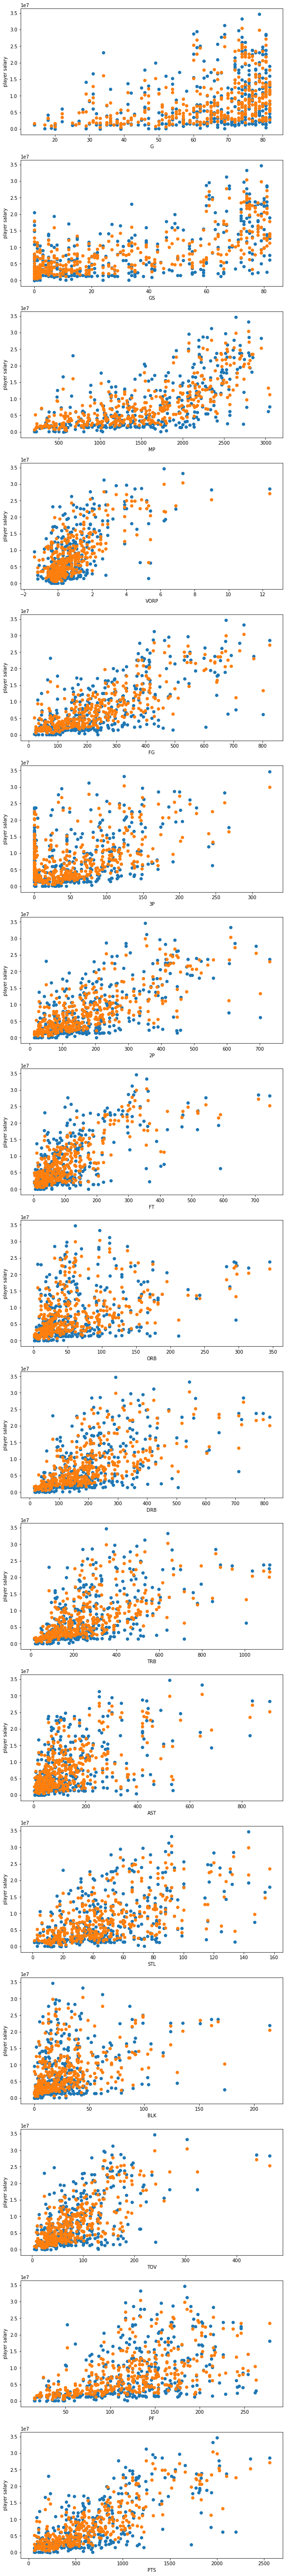

In [62]:
columns = X.columns
fig, ax = plt.subplots(len(columns),1, figsize=(10,100))
for i, col in enumerate(columns):
    ax[i].scatter(X[col], y)
    ax[i].scatter(X[col], rf_dropped_2_predict)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('player salary')

In [63]:
final_dropped_2 = dropped_df_2.copy()
final_dropped_2['rf_dropped_2_predict'] = rf_dropped_2_predict
final_dropped_2['rf_dropped_2_predict-actual'] = final_dropped_2['rf_dropped_2_predict'] - final_dropped_2[' Player Salary in $ ']

In [64]:
final_dropped_2

#  Season Start      Player Name   Player Salary in $  Pos  Age   Tm  \
1    24165          2017     Aaron Brooks             2116955.0  PG   32  IND   
2    24289          2017     Aaron Gordon             5504420.0  SF   21  ORL   
5    24343          2017       Al Horford            27734405.0   C   30  BOS   
6    24366          2017     Al Jefferson             9769821.0   C   32  IND   
8    24660          2017    Alan Williams             6000000.0   C   24  PHO   
..     ...           ...              ...                   ...  ..  ...  ...   
481  24192          2017  Wilson Chandler            12016854.0  SF   29  DEN   
482  24259          2017     Yogi Ferrell             1312611.0  PG   23  TOT   
483  24408          2017      Zach LaVine             3202217.0  SG   21  MIN   
484  24550          2017    Zach Randolph            12307692.0  PF   35  MEM   
485  24515          2017    Zaza Pachulia             3477600.0   C   32  GSW   

      G  GS    MP  VORP   FG   3P   2P   FT  ORB  DRB  TRB  AST  STL  BLK  \
1    65   0   894  -0.6  121   48   73   32   18   51   69  125   25    9   
2    80  72  2298   0.8  393   77  316  156  116  289  405  150   64   40   
5    68  68  2193   2.8  379   86  293  108   95  369  464  337   52   87   
6    66   1   931  -0.3  235    0  235   65   75  203  278   57   19   16   
8    47   0   708   0.1  138    0  138   70   94  198  292   23   27   32   
..   ..  ..   ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
481  71  33  2197   0.7  433  110  323  141  103  356  459  141   52   30   
482  46  29  1197   0.4  160   68   92   74   20   91  111  172   42    9   
483  47  47  1749   0.8  326  120  206  117   18  141  159  139   41   10   
484  73   5  1786   0.0  433   21  412  141  182  416  598  122   38   10   
485  70  70  1268   1.5  164    0  164   98  140  270  410  132   59   33   

     TOV   PF   PTS  rf_dropped_2_predict  rf_dropped_2_predict-actual  
1     66   93   322            2053053.80                    -63901.20  
2     89  172  1019            6852101.98                   1347681.98  
5    116  138   952           12158920.27                 -15575484.73  
6     33  125   535            8810185.73                   -959635.27  
8     37  125   346            6147341.73                    147341.73  
..   ...  ...   ...                   ...                          ...  
481  114  172  1117           11009107.97                  -1007746.03  
482   70   90   462            2884982.34                   1572371.34  
483   85  104   889           10009426.65                   6807209.65  
484   99  136  1028           11087580.68                  -1220111.32  
485   88  166   426           10177270.56                   6699670.56  

[378 rows x 26 columns]

In [65]:
final_dropped_2[final_dropped_2['Player Name']=='LeBron James']

#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
293  24365          2017  LeBron James            33285709.0  SF   32  CLE   

      G  GS    MP  VORP   FG   3P   2P   FT  ORB  DRB  TRB  AST  STL  BLK  \
293  74  74  2794   7.3  736  124  612  358   97  543  640  646   92   44   

     TOV   PF   PTS  rf_dropped_2_predict  rf_dropped_2_predict-actual  
293  303  134  1954           30407389.15                  -2878319.85

In [66]:
final_dropped_2[final_dropped_2['Player Name']=='Stephen Curry']

#  Season Start    Player Name   Player Salary in $  Pos  Age   Tm  \
425  24216          2017  Stephen Curry            34682550.0  PG   28  GSW   

      G  GS    MP  VORP   FG   3P   2P   FT  ORB  DRB  TRB  AST  STL  BLK  \
425  79  79  2638   6.2  675  324  351  325   61  292  353  523  143   17   

     TOV   PF   PTS  rf_dropped_2_predict  rf_dropped_2_predict-actual  
425  239  183  1999            29912194.9                   -4770355.1

In [67]:
final_dropped_2[final_dropped_2['Player Name']=='James Harden']

#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
192  24306          2017  James Harden            28299399.0  PG   27  HOU   

      G  GS    MP  VORP   FG   3P   2P   FT  ORB  DRB  TRB  AST  STL  BLK  \
192  81  81  2947   9.0  674  262  412  746   95  564  659  906  120   37   

     TOV   PF   PTS  rf_dropped_2_predict  rf_dropped_2_predict-actual  
192  464  215  2356            25294656.1                   -3004742.9

In [68]:
final_dropped_2[(final_dropped_2[' Player Salary in $ ']<5000000) & (final_dropped_2['Pos']=='C')].sort_values('rf_dropped_2_predict', ascending=False).head(5)

#  Season Start        Player Name   Player Salary in $  Pos  Age  \
185  24509          2017      Jahlil Okafor             4995120.0   C   21   
342  24630          2017       Myles Turner             2569920.0   C   20   
485  24515          2017      Zaza Pachulia             3477600.0   C   32   
480  24325          2017  Willy Hernangomez             1435750.0   C   22   
280  24507          2017       Kyle O'Quinn             4087500.0   C   26   

      Tm   G  GS    MP  VORP   FG  3P   2P   FT  ORB  DRB  TRB  AST  STL  BLK  \
185  PHI  50  33  1134  -0.4  242   0  242  106   81  159  240   58   20   49   
342  IND  81  81  2541   2.8  444  40  404  245  139  448  587  106   74  173   
485  GSW  70  70  1268   1.5  164   0  164   98  140  270  410  132   59   33   
480  NYK  72  22  1324   0.7  246   4  242   91  170  332  502   96   41   36   
280  NYK  79   8  1229   1.7  215   2  213   64  157  282  439  117   36  104   

     TOV   PF   PTS  rf_dropped_2_predict  rf_dropped_2_predict-actual  
185   91  122   590           10661808.04                   5666688.04  
342  105  262  1173           10386718.68                   7816798.68  
485   88  166   426           10177270.56                   6699670.56  
480  100  150   587            9409818.59                   7974068.59  
280   76  174   496            9266387.11                   5178887.11

In [69]:
final_dropped_2[(final_dropped_2[' Player Salary in $ ']<5000000) & (final_dropped_2['Pos']=='PG')].sort_values('rf_dropped_2_predict', ascending=False).head(5)

#  Season Start       Player Name   Player Salary in $  Pos  Age  \
119  24562          2017      Derrick Rose             2116955.0  PG   28   
190  24487          2017     Jameer Nelson             4736050.0  PG   34   
413  24215          2017        Seth Curry             3028410.0  PG   26   
139  24527          2017     Elfrid Payton             3332340.0  PG   22   
177  24656          2017  Isaiah Whitehead             1312611.0  PG   21   

      Tm   G  GS    MP  VORP   FG   3P   2P   FT  ORB  DRB  TRB  AST  STL  \
119  NYK  64  64  2082   0.0  460   13  447  221   66  180  246  283   44   
190  DEN  75  39  2045   0.0  268  106  162   45   28  164  192  385   53   
413  DAL  70  42  2029   1.7  338  137  201   85   25  153  178  188   79   
139  ORL  82  58  2412   1.7  430   40  390  146   89  298  387  529   88   
177  BRK  73  26  1643  -1.2  204   44  160   91   32  152  184  192   42   

     BLK  TOV   PF   PTS  rf_dropped_2_predict  rf_dropped_2_predict-actual  
119   17  147   84  1154            8095666.07                   5978711.07  
190    8  129  197   687            6372148.59                   1636098.59  
413    7   92  126   898            6344688.98                   3316278.98  
139   40  178  177  1046            5609842.06                   2277502.06  
177   36  142  175   543            4747395.11                   3434784.11

In [139]:
drop_columns = ['PER', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM']

In [140]:
dropped_df_3 = filtered_df.copy()
dropped_df_3 = dropped_df_3.drop(columns=drop_columns)
X, y = get_x_y(dropped_df_3)

In [141]:
X_train, X_test, y_train, y_test = tts(X,y)

In [153]:
rf_dropped_3 = RandomForestRegressor()
rf_dropped_3.fit(X,y)
rf_dropped_3.score(X,y)

0.9383788730551139

In [154]:
rf_dropped_3_predict = rf_dropped_3.predict(X)

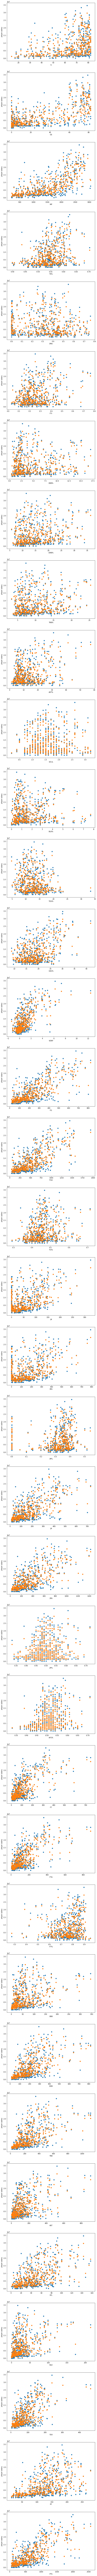

In [155]:
columns = X.columns
fig, ax = plt.subplots(len(columns),1, figsize=(10,300))
for i, col in enumerate(columns):
    ax[i].scatter(X[col], y)
    ax[i].scatter(X[col], rf_dropped_3_predict)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('player salary')

In [156]:
final_dropped_3 = dropped_df_3.copy()
final_dropped_3['rf_dropped_3_predict'] = rf_dropped_3_predict
final_dropped_3['rf_dropped_3_predict-actual'] = final_dropped_3['rf_dropped_3_predict'] - final_dropped_3[' Player Salary in $ ']

In [157]:
final_dropped_3

#  Season Start      Player Name   Player Salary in $  Pos  Age   Tm  \
1    24165          2017     Aaron Brooks             2116955.0  PG   32  IND   
2    24289          2017     Aaron Gordon             5504420.0  SF   21  ORL   
5    24343          2017       Al Horford            27734405.0   C   30  BOS   
6    24366          2017     Al Jefferson             9769821.0   C   32  IND   
8    24660          2017    Alan Williams             6000000.0   C   24  PHO   
..     ...           ...              ...                   ...  ..  ...  ...   
481  24192          2017  Wilson Chandler            12016854.0  SF   29  DEN   
482  24259          2017     Yogi Ferrell             1312611.0  PG   23  TOT   
483  24408          2017      Zach LaVine             3202217.0  SG   21  MIN   
484  24550          2017    Zach Randolph            12307692.0  PF   35  MEM   
485  24515          2017    Zaza Pachulia             3477600.0   C   32  GSW   

      G  GS    MP    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  \
1    65   0   894  0.507  0.427  0.133   2.3   6.3   4.3  20.7   1.4   0.9   
2    80  72  2298  0.530  0.309  0.251   5.3  14.1   9.6  10.5   1.4   1.4   
5    68  68  2193  0.553  0.302  0.169   4.9  18.6  11.8  24.4   1.2   3.3   
6    66   1   931  0.526  0.002  0.180   9.2  24.2  16.8  11.0   1.0   1.5   
8    47   0   708  0.547  0.004  0.419  14.0  31.2  22.4   5.2   1.8   3.7   
..   ..  ..   ...    ...    ...    ...   ...   ...   ...   ...   ...   ...   
481  71  33  2197  0.545  0.347  0.207   5.2  17.7  11.5   9.8   1.2   1.1   
482  46  29  1197  0.533  0.447  0.226   1.8   9.2   5.3  23.2   1.8   0.7   
483  47  47  1749  0.576  0.437  0.197   1.2   9.5   5.3  12.6   1.2   0.5   
484  73   5  1786  0.490  0.098  0.200  11.3  27.4  19.1  13.5   1.1   0.5   
485  70  70  1268  0.588  0.007  0.410  12.9  22.0  17.7  13.6   2.2   2.0   

     TOV%  USG%  VORP   FG  FGA    FG%   3P  3PA    3P%   2P  2PA   2P%  eFG%  \
1    17.2  19.2  -0.6  121  300  0.403   48  128  0.375   73  172  0.42  0.48   
2     8.5  20.1   0.8  393  865  0.454   77  267  0.288  316  598  0.53  0.50   
5    11.9  19.8   2.8  379  801  0.473   86  242  0.355  293  559  0.52  0.53   
6     6.1  26.1  -0.3  235  471  0.499    0    1  0.000  235  470  0.50  0.50   
8    10.5  20.9   0.1  138  267  0.517    0    1  0.000  138  266  0.52  0.52   
..    ...   ...   ...  ...  ...    ...  ...  ...    ...  ...  ...   ...   ...   
481  10.0  22.0   0.7  433  939  0.461  110  326  0.337  323  613  0.53  0.52   
482  13.9  19.6   0.4  160  394  0.406   68  176  0.386   92  218  0.42  0.49   
483   9.9  21.7   0.8  326  710  0.459  120  310  0.387  206  400  0.52  0.54   
484   8.6  29.2   0.0  433  964  0.449   21   94  0.223  412  870  0.47  0.46   
485  19.5  15.3   1.5  164  307  0.534    0    2  0.000  164  305  0.54  0.53   

      FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  \
1     32   40  0.800   18   51   69  125   25    9   66   93   322   
2    156  217  0.719  116  289  405  150   64   40   89  172  1019   
5    108  135  0.800   95  369  464  337   52   87  116  138   952   
6     65   85  0.765   75  203  278   57   19   16   33  125   535   
8     70  112  0.625   94  198  292   23   27   32   37  125   346   
..   ...  ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
481  141  194  0.727  103  356  459  141   52   30  114  172  1117   
482   74   89  0.831   20   91  111  172   42    9   70   90   462   
483  117  140  0.836   18  141  159  139   41   10   85  104   889   
484  141  193  0.731  182  416  598  122   38   10   99  136  1028   
485   98  126  0.778  140  270  410  132   59   33   88  166   426   

     rf_dropped_3_predict  rf_dropped_3_predict-actual  
1              2322509.08                    205554.08  
2              8036722.39                   2532302.39  
5             24118297.93                  -3616107.07  
6              8575757.80                  -1194063.20  


In [158]:
final_dropped_3[final_dropped_3['Player Name']=='LeBron James']

#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
293  24365          2017  LeBron James            33285709.0  SF   32  CLE   

      G  GS    MP    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  \
293  74  74  2794  0.619  0.254  0.395   4.0  20.7  12.6  41.3   1.6   1.3   

     TOV%  USG%  VORP   FG   FGA    FG%   3P  3PA    3P%   2P   2PA   2P%  \
293  16.1  30.0   7.3  736  1344  0.548  124  342  0.363  612  1002  0.61   

     eFG%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  \
293  0.59  358  531  0.674   97  543  640  646   92   44  303  134  1954   

     rf_dropped_3_predict  rf_dropped_3_predict-actual  
293           28083739.81                  -5201969.19

In [159]:
final_dropped_3[final_dropped_3['Player Name']=='Stephen Curry']

#  Season Start    Player Name   Player Salary in $  Pos  Age   Tm  \
425  24216          2017  Stephen Curry            34682550.0  PG   28  GSW   

      G  GS    MP    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  \
425  79  79  2638  0.624  0.547  0.251   2.7  11.4   7.3  31.1   2.6   0.5   

     TOV%  USG%  VORP   FG   FGA    FG%   3P  3PA    3P%   2P  2PA   2P%  \
425  13.0  30.1   6.2  675  1443  0.468  324  789  0.411  351  654  0.54   

     eFG%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  \
425  0.58  325  362  0.898   61  292  353  523  143   17  239  183  1999   

     rf_dropped_3_predict  rf_dropped_3_predict-actual  
425           29652771.41                  -5029778.59

In [160]:
final_dropped_3[final_dropped_3['Player Name']=='James Harden']

#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
192  24306          2017  James Harden            28299399.0  PG   27  HOU   

      G  GS    MP    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  \
192  81  81  2947  0.613  0.493  0.575   3.5  20.9  12.2  50.7   2.0   1.0   

     TOV%  USG%  VORP   FG   FGA   FG%   3P  3PA    3P%   2P  2PA   2P%  eFG%  \
192  19.5  34.2   9.0  674  1533  0.44  262  756  0.347  412  777  0.53  0.53   

      FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  \
192  746  881  0.847   95  564  659  906  120   37  464  215  2356   

     rf_dropped_3_predict  rf_dropped_3_predict-actual  
192           25763220.01                  -2536178.99

In [161]:
final_dropped_3[(final_dropped_3[' Player Salary in $ ']<5000000) & (final_dropped_3['Pos']=='C')].sort_values('rf_dropped_3_predict', ascending=False).head(5)

#  Season Start    Player Name   Player Salary in $  Pos  Age   Tm  \
342  24630          2017   Myles Turner             2569920.0   C   20  IND   
185  24509          2017  Jahlil Okafor             4995120.0   C   21  PHI   
352  24380          2017   Nikola Jokic             1471382.0   C   21  DEN   
280  24507          2017   Kyle O'Quinn             4087500.0   C   26  NYK   
345  24494          2017   Nerlens Noel             4187599.0   C   22  TOT   

      G  GS    MP    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  \
342  81  81  2541  0.585  0.132  0.349   6.2  19.5  13.0   6.6   1.5   6.0   
185  50  33  1134  0.546  0.000  0.335   7.9  15.5  11.7   9.0   0.9   3.4   
352  73  59  2038  0.640  0.163  0.267  11.6  27.2  19.5  28.8   1.5   2.1   
280  79   8  1229  0.552  0.041  0.201  13.7  24.8  19.2  14.8   1.5   6.9   
345  51  19  1047  0.622  0.003  0.359   9.8  22.3  15.9   8.1   3.1   4.1   

     TOV%  USG%  VORP   FG  FGA    FG%  3P  3PA       3P%   2P  2PA   2P%  \
342   9.5  19.5   2.8  444  869  0.511  40  115  0.348000  404  754  0.54   
185  14.4  24.1  -0.4  242  471  0.514   0    0  0.299342  242  471  0.51   
352  15.2  23.5   5.3  494  854  0.578  45  139  0.324000  449  715  0.63   
280  14.5  18.5   1.7  215  413  0.521   2   17  0.118000  213  396  0.54   
345  12.5  17.6   1.4  184  309  0.595   0    1  0.000000  184  308  0.60   

     eFG%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  \
342  0.53  245  303  0.809  139  448  587  106   74  173  105  262  1173   
185  0.51  106  158  0.671   81  159  240   58   20   49   91  122   590   
352  0.61  188  228  0.825  212  506  718  359   61   56  171  214  1221   
280  0.52   64   83  0.771  157  282  439  117   36  104   76  174   496   
345  0.60   77  111  0.694   93  201  294   50   65   51   51  126   445   

     rf_dropped_3_predict  rf_dropped_3_predict-actual  
342            9328724.10                   6758804.10  
185            6711208.68                   1716088.68  
352            6648124.33                   5176742.33  
280            5586823.90                   1499323.90  
345            5272923.66                   1085324.66

In [162]:
final_dropped_3[(final_dropped_3[' Player Salary in $ ']<5000000) & (final_dropped_3['Pos']=='PG')].sort_values('rf_dropped_3_predict', ascending=False).head(5)

#  Season Start    Player Name   Player Salary in $  Pos  Age   Tm  \
139  24527          2017  Elfrid Payton             3332340.0  PG   22  ORL   
119  24562          2017   Derrick Rose             2116955.0  PG   28  NYK   
190  24487          2017  Jameer Nelson             4736050.0  PG   34  DEN   
413  24215          2017     Seth Curry             3028410.0  PG   26  DAL   
379  24561          2017    Rajon Rondo             3300000.0  PG   30  CHI   

      G  GS    MP    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  \
139  82  58  2412  0.520  0.160  0.231   3.9  13.8   8.7  35.7   1.8   1.3   
119  64  64  2082  0.530  0.061  0.259   3.4   9.3   6.4  22.8   1.1   0.7   
190  75  39  2045  0.544  0.452  0.104   1.5   8.8   5.2  26.0   1.3   0.3   
413  70  42  2029  0.601  0.458  0.142   1.4   9.2   5.1  15.9   2.0   0.3   
379  69  42  1843  0.461  0.237  0.089   4.2  16.6  10.4  37.0   2.7   0.5   

     TOV%  USG%  VORP   FG  FGA    FG%   3P  3PA    3P%   2P  2PA   2P%  eFG%  \
139  15.0  21.6   1.7  430  912  0.471   40  146  0.274  390  766  0.51  0.49   
119  11.9  25.7   0.0  460  977  0.471   13   60  0.217  447  917  0.49  0.48   
190  17.0  15.8   0.0  268  604  0.444  106  273  0.388  162  331  0.49  0.53   
413  11.0  19.5   1.7  338  703  0.481  137  322  0.425  201  381  0.53  0.58   
379  22.4  17.8   1.1  229  561  0.408   50  133  0.376  179  428  0.42  0.45   

      FT  FTA    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  \
139  146  211  0.692   89  298  387  529   88   40  178  177  1046   
119  221  253  0.874   66  180  246  283   44   17  147   84  1154   
190   45   63  0.714   28  164  192  385   53    8  129  197   687   
413   85  100  0.850   25  153  178  188   79    7   92  126   898   
379   30   50  0.600   73  282  355  461   99   11  168  144   538   

     rf_dropped_3_predict  rf_dropped_3_predict-actual  
139            7307935.00                   3975595.00  
119            7278864.82                   5161909.82  
190            6258541.20                   1522491.20  
413            6190195.26                   3161785.26  
379            4948635.41                   1648635.41

In [100]:
drop_columns = ['G', 'GS', 'MP', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'VORP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

In [101]:
ws_per_bpm = filtered_df.drop(columns=drop_columns)

In [102]:
x,y = get_x_y(ws_per_bpm)

In [103]:
X_train, X_test, y_train, y_test = tts(x,y)

In [104]:
rf_ws_per_bpm = RandomForestRegressor()
rf_ws_per_bpm.fit(X_train,y_train)
rf_ws_per_bpm.score(X_test,y_test)

0.37784824139572215

In [105]:
rf_ws_per_bpm_predict = rf_ws_per_bpm.predict(x)

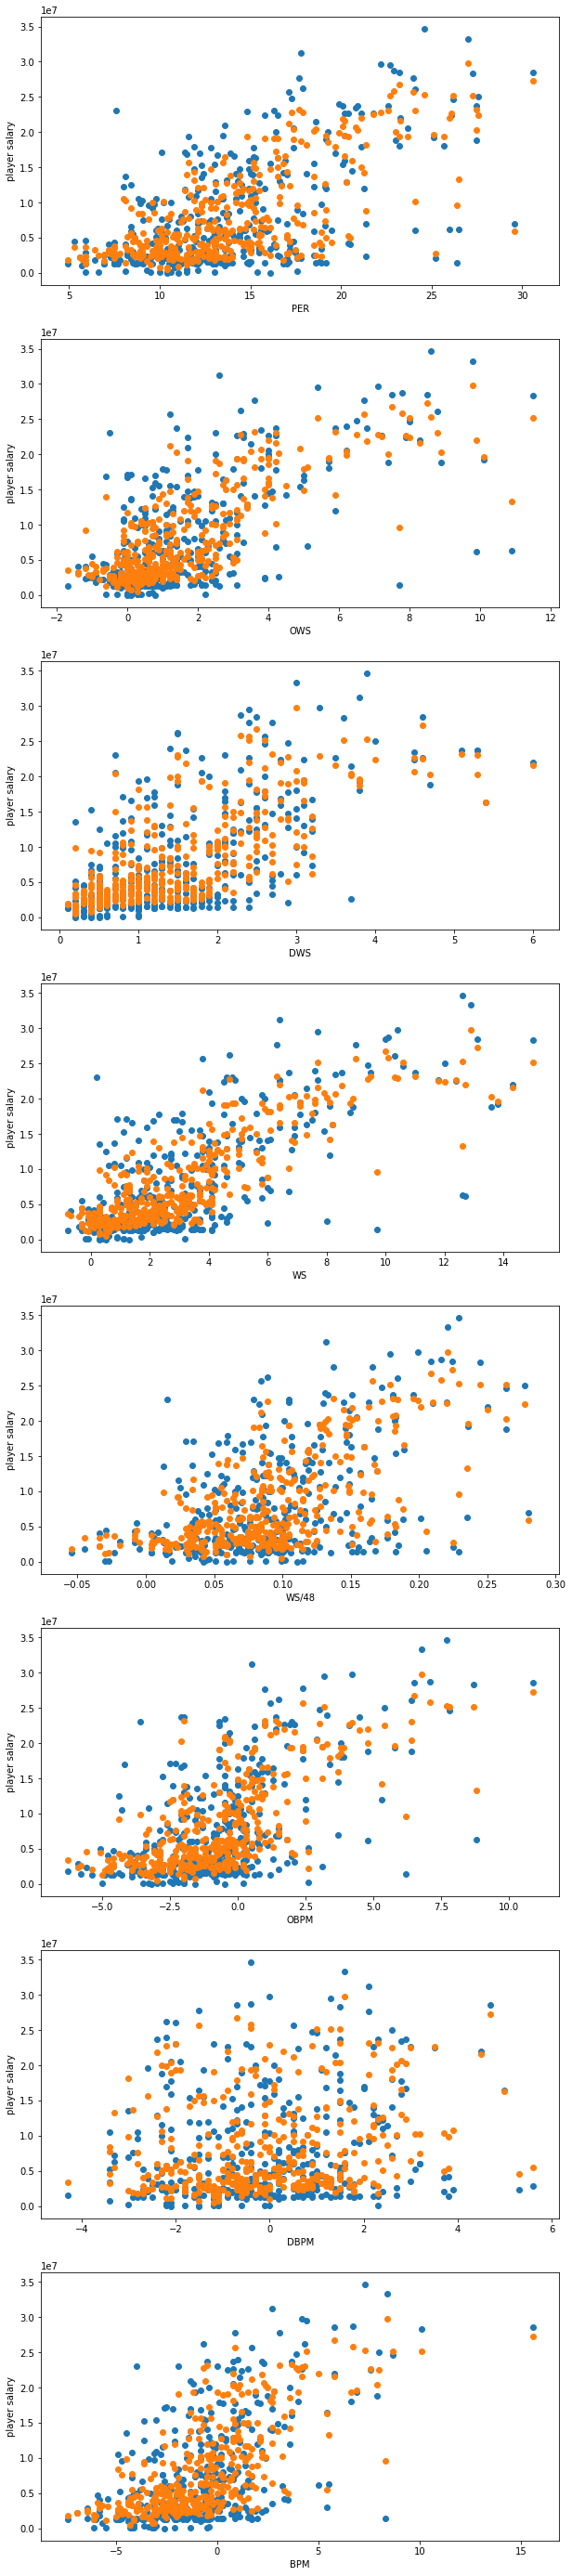

In [108]:
columns = x.columns
fig, ax = plt.subplots(len(columns),1, figsize=(10,50))
for i, col in enumerate(columns):
    ax[i].scatter(x[col], y)
    ax[i].scatter(x[col], rf_ws_per_bpm_predict)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('player salary')

In [109]:
final_ws_per_bpm = ws_per_bpm.copy()
final_ws_per_bpm['rf_ws_per_bpm_predict'] = rf_ws_per_bpm_predict
final_ws_per_bpm['rf_ws_per_bpm_predict-actual'] = final_ws_per_bpm['rf_ws_per_bpm_predict'] - final_ws_per_bpm[' Player Salary in $ ']

In [110]:
final_ws_per_bpm

#  Season Start      Player Name   Player Salary in $  Pos  Age   Tm  \
1    24165          2017     Aaron Brooks             2116955.0  PG   32  IND   
2    24289          2017     Aaron Gordon             5504420.0  SF   21  ORL   
5    24343          2017       Al Horford            27734405.0   C   30  BOS   
6    24366          2017     Al Jefferson             9769821.0   C   32  IND   
8    24660          2017    Alan Williams             6000000.0   C   24  PHO   
..     ...           ...              ...                   ...  ..  ...  ...   
481  24192          2017  Wilson Chandler            12016854.0  SF   29  DEN   
482  24259          2017     Yogi Ferrell             1312611.0  PG   23  TOT   
483  24408          2017      Zach LaVine             3202217.0  SG   21  MIN   
484  24550          2017    Zach Randolph            12307692.0  PF   35  MEM   
485  24515          2017    Zaza Pachulia             3477600.0   C   32  GSW   

      PER  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  rf_ws_per_bpm_predict  \
1     9.5 -0.2  0.5  0.3  0.016  -2.1  -2.6 -4.6             2392212.80   
2    14.4  2.0  1.7  3.7  0.076  -0.2  -0.4 -0.7             6154929.97   
5    17.7  3.6  2.7  6.3  0.137   1.0   2.1  3.1            23226421.32   
6    18.9  1.2  1.1  2.3  0.119  -1.5  -1.5 -3.1             3929302.26   
8    19.5  1.1  0.9  2.1  0.142  -1.8   0.2 -1.7             4337082.54   
..    ...  ...  ...  ...    ...   ...   ...  ...                    ...   
481  14.9  2.4  1.1  3.6  0.078   0.5  -1.3 -0.8            10204360.29   
482  13.1  0.8  1.0  1.8  0.072  -0.1  -0.7 -0.7             2907389.64   
483  14.6  2.5  0.4  3.0  0.082   2.1  -2.4 -0.3             4176900.80   
484  18.5  0.8  2.4  3.2  0.086  -1.4  -0.7 -2.1             8577743.38   
485  16.1  2.2  2.5  4.7  0.177  -0.3   3.0  2.7             6429900.07   

     rf_ws_per_bpm_predict-actual  
1                       275257.80  
2                       650509.97  
5                     -4507983.68  
6                     -5840518.74  
8                     -1662917.46  
..                            ...  
481                   -1812493.71  
482                    1594778.64  
483                     974683.80  
484                   -3729948.62  
485                    2952300.07  

[378 rows x 17 columns]

In [111]:
final_ws_per_bpm[final_ws_per_bpm['Player Name']=='LeBron James']

#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
293  24365          2017  LeBron James            33285709.0  SF   32  CLE   

      PER  OWS  DWS    WS  WS/48  OBPM  DBPM  BPM  rf_ws_per_bpm_predict  \
293  27.0  9.8  3.0  12.9  0.221   6.8   1.6  8.4            29820851.33   

     rf_ws_per_bpm_predict-actual  
293                   -3464857.67

In [112]:
final_ws_per_bpm[final_ws_per_bpm['Player Name']=='Stephen Curry']

#  Season Start    Player Name   Player Salary in $  Pos  Age   Tm  \
425  24216          2017  Stephen Curry            34682550.0  PG   28  GSW   

      PER  OWS  DWS    WS  WS/48  OBPM  DBPM  BPM  rf_ws_per_bpm_predict  \
425  24.6  8.6  3.9  12.6  0.229   7.7  -0.4  7.3            25338106.52   

     rf_ws_per_bpm_predict-actual  
425                   -9344443.48

In [113]:
final_ws_per_bpm[final_ws_per_bpm['Player Name']=='James Harden']

#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
192  24306          2017  James Harden            28299399.0  PG   27  HOU   

      PER   OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  rf_ws_per_bpm_predict  \
192  27.3  11.5  3.6  15.0  0.245   8.7   1.5  10.1            25216469.74   

     rf_ws_per_bpm_predict-actual  
192                   -3082929.26

In [114]:
final_ws_per_bpm[(final_ws_per_bpm[' Player Salary in $ ']<5000000) & (final_ws_per_bpm['Pos']=='C')].sort_values('rf_ws_per_bpm_predict', ascending=False).head(5)

#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
342  24630          2017  Myles Turner             2569920.0   C   20  IND   
103  24653          2017    David West             2328652.0   C   36  GSW   
406  24460          2017   Salah Mejri             1471382.0   C   30  DAL   
352  24380          2017  Nikola Jokic             1471382.0   C   21  DEN   
78   24182          2017  Clint Capela             2334520.0   C   22  HOU   

      PER  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  rf_ws_per_bpm_predict  \
342  18.5  4.3  3.7  8.0  0.151  -0.3   2.7  2.4            20219072.26   
103  16.6  0.9  1.7  2.6  0.148  -1.7   3.9  2.2            10820125.77   
406  14.8  1.3  1.7  3.0  0.159  -3.6   3.8  0.2             9935779.06   
352  26.4  7.7  2.0  9.7  0.229   6.2   2.2  8.3             9622268.58   
78   21.4  3.9  2.1  6.0  0.185   0.0   1.0  1.0             8871746.87   

     rf_ws_per_bpm_predict-actual  
342                   17649152.26  
103                    8491473.77  
406                    8464397.06  
352                    8150886.58  
78                     6537226.87

In [115]:
final_ws_per_bpm[(final_ws_per_bpm[' Player Salary in $ ']<5000000) & (final_ws_per_bpm['Pos']=='PG')].sort_values('rf_ws_per_bpm_predict', ascending=False).head(5)

#  Season Start       Player Name   Player Salary in $  Pos  Age  \
139  24527          2017     Elfrid Payton             3332340.0  PG   22   
413  24215          2017        Seth Curry             3028410.0  PG   26   
379  24561          2017       Rajon Rondo             3300000.0  PG   30   
52   24369          2017  Brandon Jennings              380830.0  PG   27   
429  24444          2017    T.J. McConnell             1471382.0  PG   24   

      Tm   PER  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  rf_ws_per_bpm_predict  \
139  ORL  17.2  2.4  2.0  4.4  0.088   0.7   0.2  0.9            12441617.16   
413  DAL  15.5  2.9  1.7  4.6  0.109   1.8  -0.4  1.4            11729041.66   
379  CHI  13.6 -0.3  2.7  2.3  0.061  -1.3   1.6  0.3             6136032.71   
52   TOT  12.1  0.7  1.0  1.7  0.046  -0.8  -2.2 -3.0             5752250.37   
429  PHI  13.7  1.4  2.4  3.8  0.084  -2.0   0.1 -1.9             5424520.67   

     rf_ws_per_bpm_predict-actual  
139                    9109277.16  
413                    8700631.66  
379                    2836032.71  
52                     5371420.37  
429                    3953138.67

In [182]:
drop_columns = ['G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','WS/48']

In [183]:
ws_only = filtered_df.drop(columns=drop_columns)

In [184]:
ws_only

#  Season Start      Player Name   Player Salary in $  Pos  Age   Tm  \
1    24165          2017     Aaron Brooks             2116955.0  PG   32  IND   
2    24289          2017     Aaron Gordon             5504420.0  SF   21  ORL   
5    24343          2017       Al Horford            27734405.0   C   30  BOS   
6    24366          2017     Al Jefferson             9769821.0   C   32  IND   
8    24660          2017    Alan Williams             6000000.0   C   24  PHO   
..     ...           ...              ...                   ...  ..  ...  ...   
481  24192          2017  Wilson Chandler            12016854.0  SF   29  DEN   
482  24259          2017     Yogi Ferrell             1312611.0  PG   23  TOT   
483  24408          2017      Zach LaVine             3202217.0  SG   21  MIN   
484  24550          2017    Zach Randolph            12307692.0  PF   35  MEM   
485  24515          2017    Zaza Pachulia             3477600.0   C   32  GSW   

     OWS  DWS   WS  
1   -0.2  0.5  0.3  
2    2.0  1.7  3.7  
5    3.6  2.7  6.3  
6    1.2  1.1  2.3  
8    1.1  0.9  2.1  
..   ...  ...  ...  
481  2.4  1.1  3.6  
482  0.8  1.0  1.8  
483  2.5  0.4  3.0  
484  0.8  2.4  3.2  
485  2.2  2.5  4.7  

[378 rows x 10 columns]

In [204]:
x,y = get_x_y(ws_only)

In [205]:
X_train, X_test, y_train, y_test = tts(x,y)

In [206]:
rf_ws = RandomForestRegressor()
rf_ws.fit(x,y)
rf_ws.score(x,y)

0.9016065574386462

In [207]:
rf_ws_predict = rf_ws.predict(x)

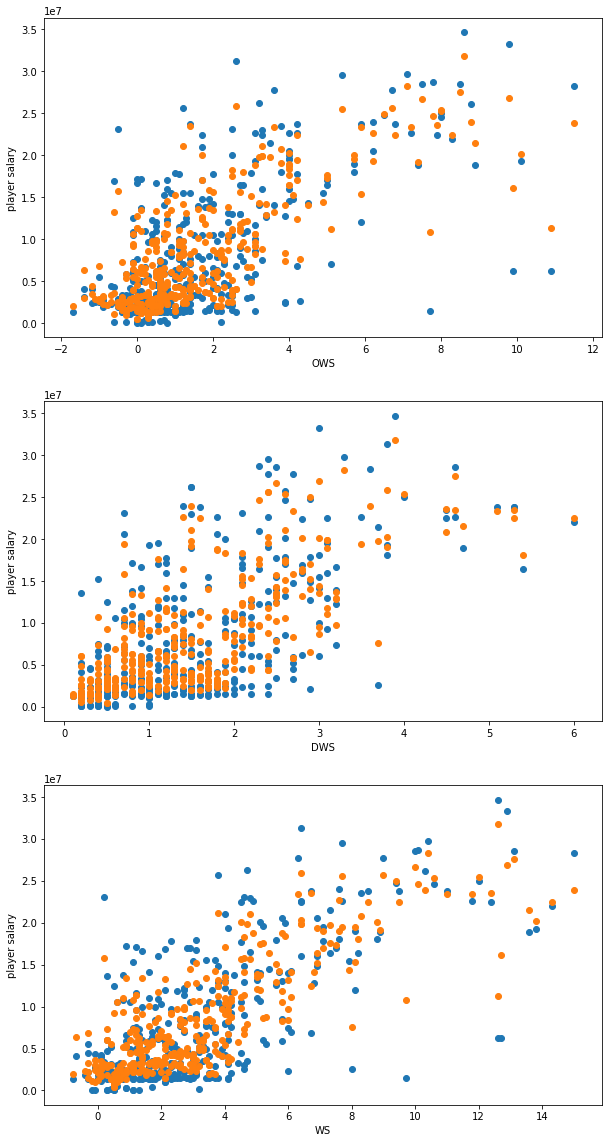

In [208]:
columns = x.columns
fig, ax = plt.subplots(len(columns),1, figsize=(10,20))
for i, col in enumerate(columns):
    ax[i].scatter(x[col], y)
    ax[i].scatter(x[col], rf_ws_predict)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('player salary')

In [209]:
final_ws = ws_only.copy()
final_ws['rf_ws_predict'] = rf_ws_predict.astype('int')
final_ws['rf_ws_predict-actual'] = final_ws['rf_ws_predict'] - final_ws[' Player Salary in $ ']

In [210]:
final_ws

#  Season Start      Player Name   Player Salary in $  Pos  Age   Tm  \
1    24165          2017     Aaron Brooks             2116955.0  PG   32  IND   
2    24289          2017     Aaron Gordon             5504420.0  SF   21  ORL   
5    24343          2017       Al Horford            27734405.0   C   30  BOS   
6    24366          2017     Al Jefferson             9769821.0   C   32  IND   
8    24660          2017    Alan Williams             6000000.0   C   24  PHO   
..     ...           ...              ...                   ...  ..  ...  ...   
481  24192          2017  Wilson Chandler            12016854.0  SF   29  DEN   
482  24259          2017     Yogi Ferrell             1312611.0  PG   23  TOT   
483  24408          2017      Zach LaVine             3202217.0  SG   21  MIN   
484  24550          2017    Zach Randolph            12307692.0  PF   35  MEM   
485  24515          2017    Zaza Pachulia             3477600.0   C   32  GSW   

     OWS  DWS   WS  rf_ws_predict  rf_ws_predict-actual  
1   -0.2  0.5  0.3        2798970              682015.0  
2    2.0  1.7  3.7        4657327             -847093.0  
5    3.6  2.7  6.3       23397795            -4336610.0  
6    1.2  1.1  2.3        9063383             -706438.0  
8    1.1  0.9  2.1        5373975             -626025.0  
..   ...  ...  ...            ...                   ...  
481  2.4  1.1  3.6       10480672            -1536182.0  
482  0.8  1.0  1.8        3100885             1788274.0  
483  2.5  0.4  3.0        3918198              715981.0  
484  0.8  2.4  3.2       10644714            -1662978.0  
485  2.2  2.5  4.7        7872468             4394868.0  

[378 rows x 12 columns]

In [211]:
final_ws[final_ws['Player Name']=='LeBron James']

#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
293  24365          2017  LeBron James            33285709.0  SF   32  CLE   

     OWS  DWS    WS  rf_ws_predict  rf_ws_predict-actual  
293  9.8  3.0  12.9       26885235            -6400474.0

In [212]:
final_ws[final_ws['Player Name']=='Stephen Curry']

#  Season Start    Player Name   Player Salary in $  Pos  Age   Tm  \
425  24216          2017  Stephen Curry            34682550.0  PG   28  GSW   

     OWS  DWS    WS  rf_ws_predict  rf_ws_predict-actual  
425  8.6  3.9  12.6       31786290            -2896260.0

In [213]:
final_ws[final_ws['Player Name']=='James Harden']

#  Season Start   Player Name   Player Salary in $  Pos  Age   Tm  \
192  24306          2017  James Harden            28299399.0  PG   27  HOU   

      OWS  DWS    WS  rf_ws_predict  rf_ws_predict-actual  
192  11.5  3.6  15.0       23890239            -4409160.0

In [214]:
final_ws[(final_ws[' Player Salary in $ ']<5000000) & (final_ws['Pos']=='C')].sort_values('rf_ws_predict', ascending=False).head(5)

#  Season Start       Player Name   Player Salary in $  Pos  Age  \
352  24380          2017      Nikola Jokic             1471382.0   C   21   
341  24309          2017  Montrezl Harrell             1471382.0   C   23   
78   24182          2017      Clint Capela             2334520.0   C   22   
485  24515          2017     Zaza Pachulia             3477600.0   C   32   
342  24630          2017      Myles Turner             2569920.0   C   20   

      Tm  OWS  DWS   WS  rf_ws_predict  rf_ws_predict-actual  
352  DEN  7.7  2.0  9.7       10821732             9350350.0  
341  HOU  3.1  1.0  4.1        9164497             7693115.0  
78   HOU  3.9  2.1  6.0        8386343             6051823.0  
485  GSW  2.2  2.5  4.7        7872468             4394868.0  
342  IND  4.3  3.7  8.0        7603550             5033630.0

In [215]:
final_ws[(final_ws[' Player Salary in $ ']<5000000) & (final_ws['Pos']=='PG')].sort_values('rf_ws_predict', ascending=False).head(5)

#  Season Start    Player Name   Player Salary in $  Pos  Age   Tm  \
95   24252          2017     Dante Exum             4992385.0  PG   21  UTA   
413  24215          2017     Seth Curry             3028410.0  PG   26  DAL   
122  24310          2017   Devin Harris             4402546.0  PG   33  DAL   
379  24561          2017    Rajon Rondo             3300000.0  PG   30  CHI   
139  24527          2017  Elfrid Payton             3332340.0  PG   22  ORL   

     OWS  DWS   WS  rf_ws_predict  rf_ws_predict-actual  
95  -0.1  1.3  1.2        7217094             2224709.0  
413  2.9  1.7  4.6        6726912             3698502.0  
122  1.1  1.1  2.2        6533955             2131409.0  
379 -0.3  2.7  2.3        5832467             2532467.0  
139  2.4  2.0  4.4        5740985             2408645.0

In [218]:
final_ws.sort_values('rf_ws_predict', ascending=False).head(20)

#  Season Start            Player Name   Player Salary in $  Pos  \
425  24216          2017          Stephen Curry            34682550.0  PG   
163  24321          2017         Gordon Hayward            29727900.0  SF   
403  24654          2017      Russell Westbrook            28530608.0  PG   
293  24365          2017           LeBron James            33285709.0  SF   
331  24201          2017            Mike Conley            28530608.0  PG   
372  24467          2017           Paul Millsap            31269231.0  PF   
110  24226          2017          DeMar DeRozan            27739975.0  SG   
42   24302          2017          Blake Griffin            29512900.0  PF   
267  24239          2017           Kevin Durant            25000000.0  SF   
76   24522          2017             Chris Paul            24599495.0  PG   
361  24538          2017            Otto Porter            24773250.0  SF   
279  24429          2017             Kyle Lowry            28703704.0  PG   
88   24421          2017         Damian Lillard            26153057.0  PG   
192  24306          2017           James Harden            28299399.0  PG   
160  24115          2017  Giannis Antetokounmpo            22471910.0  SF   
19   24233          2017         Andre Drummond            23775506.0   C   
106  24389          2017         DeAndre Jordan            22642350.0   C   
5    24343          2017             Al Horford            27734405.0   C   
28   24218          2017          Anthony Davis            23775506.0   C   
62   24443          2017          C.J. McCollum            23962573.0  SG   

     Age   Tm   OWS  DWS    WS  rf_ws_predict  rf_ws_predict-actual  
425   28  GSW   8.6  3.9  12.6       31786290            -2896260.0  
163   26  UTA   7.1  3.3  10.4       28275427            -1452473.0  
403   28  OKC   8.5  4.6  13.1       27547681             -982927.0  
293   32  CLE   9.8  3.0  12.9       26885235            -6400474.0  
331   29  MEM   7.5  2.5  10.0       26677152            -1853456.0  
372   31  ATL   2.6  3.8   6.4       25889782            -5379449.0  
110   27  TOR   6.7  2.4   9.0       25631524            -2108451.0  
42    27  LAC   5.4  2.4   7.7       25544629            -3968271.0  
267   28  GSW   8.0  4.0  12.0       25404401              404401.0  
76    31  LAC   8.0  2.6  10.6       25311960              712465.0  
361   23  WAS   6.5  2.9   9.4       24957176              183926.0  
279   30  TOR   7.8  2.3  10.1       24650446            -4053258.0  
88    26  POR   8.8  1.5  10.3       23951780            -2201277.0  
192   27  HOU  11.5  3.6  15.0       23890239            -4409160.0  
160   22  MIL   7.9  4.5  12.4       23554963             1083053.0  
19    23  DET   1.4  5.3   6.7       23513438             -262068.0  
106   28  LAC   7.2  4.6  11.8       23420574              778224.0  
5     30  BOS   3.6  2.7   6.3       23397795            -4336610.0  
28    23  NOP   5.9  5.1  11.0       23377039             -398467.0  
62    25  POR   6.2  1.4   7.6       22673812            -1288761.0

In [221]:
filtered_df.sort_values('WS', ascending=False).head(10)

#  Season Start            Player Name   Player Salary in $  Pos  \
192  24306          2017           James Harden            28299399.0  PG   
402  24285          2017            Rudy Gobert            21974719.0   C   
217  24175          2017           Jimmy Butler            19301070.0  SF   
259  24414          2017          Kawhi Leonard            18868625.0  SF   
403  24654          2017      Russell Westbrook            28530608.0  PG   
293  24365          2017           LeBron James            33285709.0  SF   
258  24625          2017     Karl-Anthony Towns             6216840.0   C   
176  24612          2017          Isaiah Thomas             6261395.0  PG   
425  24216          2017          Stephen Curry            34682550.0  PG   
160  24115          2017  Giannis Antetokounmpo            22471910.0  SF   

     Age   Tm   G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
192   27  HOU  81  81  2947  27.3  0.613  0.493  0.575   3.5  20.9  12.2   
402   24  UTA  81  81  2744  23.3  0.682  0.002  0.763  13.6  29.5  21.8   
217   27  CHI  76  75  2809  25.1  0.586  0.198  0.540   4.9  13.2   9.0   
259   25  SAS  74  74  2474  27.5  0.611  0.294  0.407   3.7  15.7   9.8   
403   28  OKC  81  81  2802  30.6  0.554  0.300  0.433   5.4  28.8  17.1   
293   32  CLE  74  74  2794  27.0  0.619  0.254  0.395   4.0  20.7  12.6   
258   21  MIN  82  82  3030  26.0  0.618  0.186  0.289  11.2  27.8  19.4   
176   27  BOS  76  76  2569  26.5  0.625  0.439  0.441   1.9   7.0   4.4   
425   28  GSW  79  79  2638  24.6  0.624  0.547  0.251   2.7  11.4   7.3   
160   22  MIL  80  80  2845  26.1  0.599  0.143  0.486   5.9  22.6  14.3   

     AST%  STL%  BLK%  TOV%  USG%   OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  \
192  50.7   2.0   1.0  19.5  34.2  11.5  3.6  15.0  0.245   8.7   1.5  10.1   
402   5.7   0.9   6.4  15.1  16.7   8.3  6.0  14.3  0.250   1.4   4.5   5.8   
217  24.8   2.6   0.9   9.3  26.5  10.1  3.8  13.8  0.236   5.8   1.1   6.9   
259  18.9   2.7   1.8   9.1  31.1   8.9  4.7  13.6  0.264   6.4   1.5   7.9   
403  57.3   2.3   0.9  15.9  41.7   8.5  4.6  13.1  0.224  10.9   4.7  15.6   
293  41.3   1.6   1.3  16.1  30.0   9.8  3.0  12.9  0.221   6.8   1.6   8.4   
258  13.2   1.0   2.9  11.3  27.5   9.9  2.8  12.7  0.201   4.8   0.3   5.0   
176  32.6   1.4   0.4  10.7  34.0  10.9  1.6  12.6  0.235   8.8  -3.3   5.5   
425  31.1   2.6   0.5  13.0  30.1   8.6  3.9  12.6  0.229   7.7  -0.4   7.3   
160  26.6   2.3   4.7  13.3  28.3   7.9  4.5  12.4  0.210   4.1   3.5   7.6   

     VORP   FG   FGA    FG%   3P  3PA    3P%   2P   2PA   2P%  eFG%   FT  FTA  \
192   9.0  674  1533  0.440  262  756  0.347  412   777  0.53  0.53  746  881   
402   5.4  413   624  0.662    0    1  0.000  413   623  0.66  0.66  311  476   
217   6.3  570  1252  0.455   91  248  0.367  479  1004  0.48  0.49  585  676   
259   6.2  636  1311  0.485  147  386  0.381  489   925  0.53  0.54  469  533   
403  12.4  824  1941  0.425  200  583  0.343  624  1358  0.46  0.48  710  840   
293   7.3  736  1344  0.548  124  342  0.363  612  1002  0.61  0.59  358  531   
258   5.4  802  1479  0.542  101  275  0.367  701  1204  0.58  0.58  356  428   
176   4.8  682  1473  0.463  245  646  0.379  437   827  0.53  0.55  590  649   
425   6.2  675  1443  0.468  324  789  0.411  351   654  0.54  0.58  325  362   
160   6.9  656  1259  0.521   49  180  0.272  607  1079  0.56  0.54  471  612   

       FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
192  0.847   95  564   659  906  120   37  464  215  2356  
402  0.653  314  721  1035   97   49  214  148  246  1137  
217  0.865  129  341   470  417  143   32  159  112  1816  
259  0.880   80  350   430  260  132   55  154  122  1888  
403  0.845  137  727   864  840  133   31  438  190  2558  
293  0.674   97  543   640  646   92   44  303  134  1954  
258  0.832  296  711  1007  220   57  103  212  241  2061  
176  0.909   43  162   205  449   70   13  210  167  2199  
425  0.898   61  292  

In [222]:
filtered_df.sort_values('OWS', ascending=False).head(10)

#  Season Start         Player Name   Player Salary in $  Pos  Age  \
192  24306          2017        James Harden            28299399.0  PG   27   
176  24612          2017       Isaiah Thomas             6261395.0  PG   27   
217  24175          2017        Jimmy Butler            19301070.0  SF   27   
258  24625          2017  Karl-Anthony Towns             6216840.0   C   21   
293  24365          2017        LeBron James            33285709.0  SF   32   
259  24414          2017       Kawhi Leonard            18868625.0  SF   25   
88   24421          2017      Damian Lillard            26153057.0  PG   26   
425  24216          2017       Stephen Curry            34682550.0  PG   28   
403  24654          2017   Russell Westbrook            28530608.0  PG   28   
402  24285          2017         Rudy Gobert            21974719.0   C   24   

      Tm   G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  AST%  \
192  HOU  81  81  2947  27.3  0.613  0.493  0.575   3.5  20.9  12.2  50.7   
176  BOS  76  76  2569  26.5  0.625  0.439  0.441   1.9   7.0   4.4  32.6   
217  CHI  76  75  2809  25.1  0.586  0.198  0.540   4.9  13.2   9.0  24.8   
258  MIN  82  82  3030  26.0  0.618  0.186  0.289  11.2  27.8  19.4  13.2   
293  CLE  74  74  2794  27.0  0.619  0.254  0.395   4.0  20.7  12.6  41.3   
259  SAS  74  74  2474  27.5  0.611  0.294  0.407   3.7  15.7   9.8  18.9   
88   POR  75  75  2694  24.1  0.586  0.388  0.366   1.9  13.3   7.6  28.7   
425  GSW  79  79  2638  24.6  0.624  0.547  0.251   2.7  11.4   7.3  31.1   
403  OKC  81  81  2802  30.6  0.554  0.300  0.433   5.4  28.8  17.1  57.3   
402  UTA  81  81  2744  23.3  0.682  0.002  0.763  13.6  29.5  21.8   5.7   

     STL%  BLK%  TOV%  USG%   OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP  \
192   2.0   1.0  19.5  34.2  11.5  3.6  15.0  0.245   8.7   1.5  10.1   9.0   
176   1.4   0.4  10.7  34.0  10.9  1.6  12.6  0.235   8.8  -3.3   5.5   4.8   
217   2.6   0.9   9.3  26.5  10.1  3.8  13.8  0.236   5.8   1.1   6.9   6.3   
258   1.0   2.9  11.3  27.5   9.9  2.8  12.7  0.201   4.8   0.3   5.0   5.4   
293   1.6   1.3  16.1  30.0   9.8  3.0  12.9  0.221   6.8   1.6   8.4   7.3   
259   2.7   1.8   9.1  31.1   8.9  4.7  13.6  0.264   6.4   1.5   7.9   6.2   
88    1.3   0.6  10.2  31.5   8.8  1.5  10.3  0.184   6.4  -2.0   4.3   4.3   
425   2.6   0.5  13.0  30.1   8.6  3.9  12.6  0.229   7.7  -0.4   7.3   6.2   
403   2.3   0.9  15.9  41.7   8.5  4.6  13.1  0.224  10.9   4.7  15.6  12.4   
402   0.9   6.4  15.1  16.7   8.3  6.0  14.3  0.250   1.4   4.5   5.8   5.4   

      FG   FGA    FG%   3P  3PA    3P%   2P   2PA   2P%  eFG%   FT  FTA  \
192  674  1533  0.440  262  756  0.347  412   777  0.53  0.53  746  881   
176  682  1473  0.463  245  646  0.379  437   827  0.53  0.55  590  649   
217  570  1252  0.455   91  248  0.367  479  1004  0.48  0.49  585  676   
258  802  1479  0.542  101  275  0.367  701  1204  0.58  0.58  356  428   
293  736  1344  0.548  124  342  0.363  612  1002  0.61  0.59  358  531   
259  636  1311  0.485  147  386  0.381  489   925  0.53  0.54  469  533   
88   661  1488  0.444  214  578  0.370  447   910  0.49  0.52  488  545   
425  675  1443  0.468  324  789  0.411  351   654  0.54  0.58  325  362   
403  824  1941  0.425  200  583  0.343  624  1358  0.46  0.48  710  840   
402  413   624  0.662    0    1  0.000  413   623  0.66  0.66  311  476   

       FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
192  0.847   95  564   659  906  120   37  464  215  2356  
176  0.909   43  162   205  449   70   13  210  167  2199  
217  0.865  129  341   470  417  143   32  159  112  1816  
258  0.832  296  711  1007  220   57  103  212  241  2061  
293  0.674   97  543   640  646   92   44  303  134  1954  
259  0.880   80  350   430  260  132   55  154  122  1888  
88   0.895   46  322   368  439   68   20  197  152  2024  
425  0.898   61  292   353  523  143   17  239  183  1999  
403  0.845  137  727   864  840  133   31  438  190  25

In [223]:
filtered_df.sort_values('DWS', ascending=False).head(10)

#  Season Start            Player Name   Player Salary in $  Pos  \
402  24285          2017            Rudy Gobert            21974719.0   C   
133  24298          2017         Draymond Green            16400000.0  PF   
168  24657          2017       Hassan Whiteside            23775506.0   C   
19   24233          2017         Andre Drummond            23775506.0   C   
28   24218          2017          Anthony Davis            23775506.0   C   
259  24414          2017          Kawhi Leonard            18868625.0  SF   
403  24654          2017      Russell Westbrook            28530608.0  PG   
106  24389          2017         DeAndre Jordan            22642350.0   C   
160  24115          2017  Giannis Antetokounmpo            22471910.0  SF   
134  24345          2017          Dwight Howard            23500000.0   C   

     Age   Tm   G  GS    MP   PER    TS%   3PAr    FTr  ORB%  DRB%  TRB%  \
402   24  UTA  81  81  2744  23.3  0.682  0.002  0.763  13.6  29.5  21.8   
133   26  GSW  76  76  2471  16.5  0.522  0.405  0.328   4.6  20.9  13.3   
168   27  MIA  77  77  2513  22.6  0.579  0.000  0.368  12.8  35.3  24.0   
19    23  DET  81  81  2409  20.9  0.518  0.008  0.390  15.1  36.3  25.3   
28    23  NOP  75  75  2708  27.5  0.579  0.088  0.424   6.7  27.9  17.3   
259   25  SAS  74  74  2474  27.5  0.611  0.294  0.407   3.7  15.7   9.8   
403   28  OKC  81  81  2802  30.6  0.554  0.300  0.433   5.4  28.8  17.1   
106   28  LAC  81  81  2570  21.8  0.673  0.003  0.737  13.3  34.6  24.2   
160   22  MIL  80  80  2845  26.1  0.599  0.143  0.486   5.9  22.6  14.3   
134   31  ATL  74  74  2199  20.8  0.627  0.003  0.692  15.0  31.7  23.5   

     AST%  STL%  BLK%  TOV%  USG%  OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  \
402   5.7   0.9   6.4  15.1  16.7  8.3  6.0  14.3  0.250   1.4   4.5   5.8   
133  27.6   3.0   3.4  19.8  16.2  2.8  5.4   8.2  0.160   0.4   5.0   5.4   
168   3.8   1.1   5.0  12.0  22.7  4.2  5.3   9.5  0.181  -2.0   1.5  -0.5   
19    5.9   2.6   3.1  12.5  22.4  1.4  5.3   6.7  0.133  -2.1   2.9   0.8   
28   11.1   1.7   5.1   9.1  32.6  5.9  5.1  11.0  0.196   1.4   2.3   3.7   
259  18.9   2.7   1.8   9.1  31.1  8.9  4.7  13.6  0.264   6.4   1.5   7.9   
403  57.3   2.3   0.9  15.9  41.7  8.5  4.6  13.1  0.224  10.9   4.7  15.6   
106   5.7   1.0   4.3  13.2  15.3  7.2  4.6  11.8  0.220   1.0   3.0   4.0   
160  26.6   2.3   4.7  13.3  28.3  7.9  4.5  12.4  0.210   4.1   3.5   7.6   
134   7.8   1.4   3.6  17.5  19.2  3.8  4.5   8.3  0.181  -0.5   2.8   2.3   

     VORP   FG   FGA    FG%   3P  3PA       3P%   2P   2PA   2P%  eFG%   FT  \
402   5.4  413   624  0.662    0    1  0.000000  413   623  0.66  0.66  311   
133   4.6  272   650  0.418   81  263  0.308000  191   387  0.49  0.48  151   
168   0.9  542   973  0.557    0    0  0.299342  542   973  0.56  0.56  225   
19    1.7  483   911  0.530    2    7  0.286000  481   904  0.53  0.53  137   
28    3.9  770  1527  0.504   40  134  0.299000  730  1393  0.52  0.52  519   
259   6.2  636  1311  0.485  147  386  0.381000  489   925  0.53  0.54  469   
403  12.4  824  1941  0.425  200  583  0.343000  624  1358  0.46  0.48  710   
106   3.9  412   577  0.714    0    2  0.000000  412   575  0.72  0.71  205   
160   6.9  656  1259  0.521   49  180  0.272000  607  1079  0.56  0.54  471   
134   2.4  388   613  0.633    0    2  0.000000  388   611  0.64  0.63  226   

     FTA    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
402  476  0.653  314  721  1035   97   49  214  148  246  1137  
133  213  0.709   98  501   599  533  154  106  184  217   776  
168  358  0.628  293  795  1088   57   56  161  154  226  1309  
19   355  0.386  345  771  1116   89  124   89  152  237  1105  
28   647  0.802  174  712   886  157   94  167  181  168  2099  
259  533  0.880   80  350   430  260  132   55  154  122  1888  
403  840  0.845  137  727   864  840  133   31  438  190  2558  
106  425  0.482  297  817  1114   96   52  135  116  212  1029  
160  612  

In [225]:
filtered_df['Pos'].unique()

array(['PG', 'SF', 'C', 'SG', 'PF', 'PF-C'], dtype=object)